In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


np.set_printoptions(precision=4)

sns.set()
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import the dataset 
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#path ='Womens_Clothing_E-Commerce_Reviews.csv'
path ='/content/drive/MyDrive/CCT/WomensClothingECommerceReviews.csv'

In [4]:
data = pd.read_csv(path)
data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [5]:
# Importing the dataset
#data = pd.read_csv('Womens_Clothing_E-Commerce_Reviews.csv')
#data

In [6]:
# dataset size
data.size

258346

In [7]:
data.shape
(23486, 11)

(23486, 11)

In [8]:
# List of features
data.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [9]:
# features information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [10]:
# 5 number summary of features
data.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [11]:
# Describing the object features 
data.describe(include=object)

,Title,Review Text,Division Name,Department Name,Class Name
count,19676,22641,23472,23472,23472
unique,13993,22634,3,6,20
top,Love it!,Perfect fit and i've gotten so many compliment...,General,Tops,Dresses
freq,136,3,13850,10468,6319


# EDA

In our business plan, we set our research question - XX , therefore we would like to focus on sentiment analysis, devide it into 3 different groups - positive, negative and neutral and to see if there is any correlation between the lenght of the review text and our independent variable. Analysing the data, we have decided for our X to be Age, Recommended IND, Positive Feedback Count and Class Name ( we decided for Class Name as Division Name and Departmant Name hold same values as Class Name. The rest of the features we will drop as we won't need them in our further data prep for machine learning.

The first thing we need to do is to check for duplicates and missing values, drop any features that have no use to us and check for correlaction between our features.

## Checking for duplicates

In [12]:
# store duplicated entries to be examined
data_dupes = data[data.duplicated()] 
print("number of duplicate rows: ", data_dupes.shape)

number of duplicate rows:  (0, 11)


 - We don't have any duplicated values

## Checking for missing values

In [13]:
data.isna().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

- We can see that 5 of our features have missing values, we will look into each of the feature in detail and see what we can do 

<Figure size 720x432 with 0 Axes>

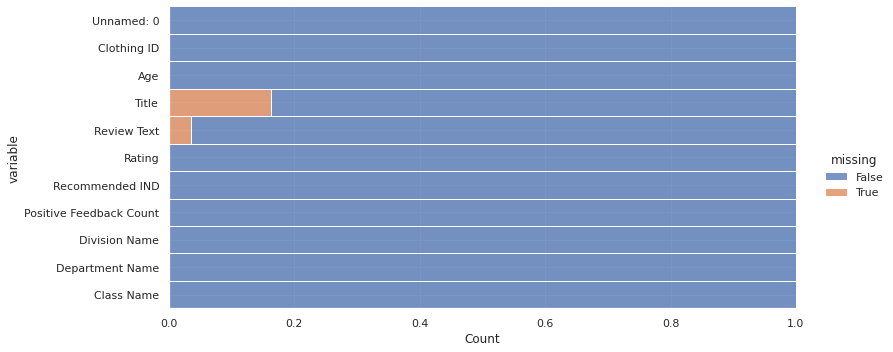

In [14]:
# Plotting the missing values over the data to see what portion of the values are missing

plt.figure(figsize=(10,6))
sns.displot(
    data=data.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=2.3
)

Our threshold for missing values is 5%. Any feature with greater than 5% missing data can be removed from the dataset.

- <b>Title</b> & <b>Review Text</b> both appear to have significant missing data.
- Will need to check how large this significance is

In [15]:
# Calculating percentage of missing data
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_data = pd.DataFrame({'percent_missing': percent_missing})

missing_value_data

,percent_missing
Unnamed: 0,0.000000
Clothing ID,0.000000
Age,0.000000
Title,16.222430
Review Text,3.597888
Rating,0.000000
Recommended IND,0.000000
Positive Feedback Count,0.000000
Division Name,0.059610
Department Name,0.059610


- <b> Title </b> has 16.22% of its data missing. A significant portion of that feature is null values. Refering back to the data dictionary we can see that this feature refers to the Heading Title of the review. NLP can be used to extract sentiment from this feature but with more than 16% of it being missing data it might be better to drop this feature. The logic being that the Title is just a summary of the actual review. The review text can express more accurate sentiment and has no word count limit compared to the Title feature which can limit the feedback a customer can express for a certain item.
<br>

- <b> Review_Text </b> only has 3.6% missing data. This implies that a customer left a review but didnt leave any comment regarding the product. As the missing values are less than 5% we do not need to remove this column. 
<br>

- <b> Division, Department and Class Name </b> also have missing values. However, it's less than 5%, therefore we won't need to drop it. We should still look into imputing the missing data.
<br>

## Dropping columns

In [16]:
# Dropping columns that has no use to us
df = data.drop(['Unnamed: 0', 'Title' ], axis=1)
df

,Clothing ID,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...
23481,1104,34,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,862,48,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,1104,31,"This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,1084,28,I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


- We decided to drop 2 of our columns - Title and Unnamed: 0, Title as there are more than 5% of missing values, also it doesn't give us any significant information. Unnamed: 0 is just the same values as our entries

- The next step now is to impute missing data, starting with Review Text, followed by Division Name, Department Name and Class Name     

## Imputing missing values

In [17]:
# Checking missing value
missing_review = df[df['Review Text'].isna()]
missing_review

,Clothing ID,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
92,861,23,NaN,5,1,0,General Petite,Tops,Knits
93,1081,31,NaN,5,1,0,General,Dresses,Dresses
98,1133,50,NaN,5,1,0,General,Jackets,Outerwear
135,861,35,NaN,4,1,0,General Petite,Tops,Knits
142,1126,35,NaN,5,1,0,General,Jackets,Outerwear
...,...,...,...,...,...,...,...,...,...
23258,862,35,NaN,4,1,0,General,Tops,Knits
23301,862,52,NaN,5,1,0,General,Tops,Knits
23303,823,46,NaN,5,1,0,General,Tops,Blouses
23470,1104,39,NaN,5,1,0,General Petite,Dresses,Dresses


- We have 845 missing values, which as it was already mnetioned, makes up of 3.6% of the missing values. As our rationale is to find out whether there is any correlation between the lengts of the text and ?????, it wouldn't be right to impute it with text. As in our next step we will be performing machine learning, we will impute the missing value with empty string.

In [18]:
# Imputing our data with an empty string
df['Review Text'] = df['Review Text'].fillna(' ')
df

,Clothing ID,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...
23481,1104,34,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,862,48,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,1104,31,"This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,1084,28,I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [19]:
df['Review Text'].tail(50)

23436    I'm 5'6" and it hits me at mid-thigh. the top ...
23437    This dress is so cute in the photo and fit tru...
23438    I feel like snagging a pair of these was the e...
23439    Love this print and fabric! its soft and comfy...
23440    I tried on this dress in the store and was ple...
23441    Don't know why but i didn't have high expectat...
23442    Love this dress, very flattering fit and the f...
23443    Love this cardigan as a wardrobe staple to qui...
23444    As per usual bordeaux is perfect with this car...
23445    I love this jacket so much, i bought two. it g...
23446    This tee is amazing. it's light weight and per...
23447    I really wanted to like this dress and was enc...
23448    I like the contrast of the skirt with the bodi...
23449    I tried these on because the color is really p...
23450    I wanted to love this jacket. so soft and grea...
23451    I recently purchased this dress at my local re...
23452    I ordered this skirt hoping i could wear it to.

- We can see that we don't have missing values in our dataset anymore and it was replaced with an empty string

In [20]:
# Double-checking for missing values
df['Review Text'].isna().sum()

0

In [21]:
# Checking for the other missing values
df.isna().sum()

Clothing ID                 0
Age                         0
Review Text                 0
Rating                      0
Recommended IND             0
Positive Feedback Count     0
Division Name              14
Department Name            14
Class Name                 14
dtype: int64

In [22]:
# Checking missing value
missing_division = df[df['Division Name'].isna()]
missing_division

,Clothing ID,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
9444,72,25,"I never write reviews, but these socks are so ...",5,1,0,NaN,NaN,NaN
13767,492,23,I just love this hoodie! it is so soft and com...,5,1,1,NaN,NaN,NaN
13768,492,49,Love this hoodie. so soft and goes with everyt...,5,1,0,NaN,NaN,NaN
13787,492,48,,5,1,0,NaN,NaN,NaN
16216,152,36,"Just what i was looking for. soft, cozy and warm.",5,1,0,NaN,NaN,NaN
16221,152,37,I am loving these. they are quite long but are...,5,1,0,NaN,NaN,NaN
16223,152,39,These leg warmers are perfect for me. they are...,5,1,0,NaN,NaN,NaN
18626,184,34,"These are amazing quality. i agree, size up to...",5,1,5,NaN,NaN,NaN
18671,184,54,These tights are amazing! if i care for them w...,5,1,0,NaN,NaN,NaN
20088,772,50,This sweatshirt is really nice! it's oversize...,5,1,0,NaN,NaN,NaN


In [23]:
# Number of missing values
missing_division.shape

(14, 9)

- We can see that Division Name, Department Name and Class Name have exactly the same values missing. We could impute them as we know the Clothing ID, but since it's only 14 values which makes up 0.06% missing values of the whole data, we can drop them.

In [24]:
df.isna().sum()

Clothing ID                 0
Age                         0
Review Text                 0
Rating                      0
Recommended IND             0
Positive Feedback Count     0
Division Name              14
Department Name            14
Class Name                 14
dtype: int64

In [25]:
# Dropping all rows with at least one NaN
new_df = df.dropna(axis = 0, how ='any')  

In [26]:
# Double-checking for missing values
new_df.isna().sum()

Clothing ID                0
Age                        0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

- Now that we managed all our missing values, we will look closely on Division, Departmet and Class Name to see if we could potentially drop more columns

In [27]:
# Uniques Values
new_df['Division Name'].unique()

array(['Initmates', 'General', 'General Petite'], dtype=object)

In [28]:
# Uniques Values
new_df['Department Name'].unique()

array(['Intimate', 'Dresses', 'Bottoms', 'Tops', 'Jackets', 'Trend'],
      dtype=object)

In [29]:
# Uniques Values
new_df['Class Name'].unique()

array(['Intimates', 'Dresses', 'Pants', 'Blouses', 'Knits', 'Outerwear',
       'Lounge', 'Sweaters', 'Skirts', 'Fine gauge', 'Sleep', 'Jackets',
       'Swim', 'Trend', 'Jeans', 'Legwear', 'Shorts', 'Layering',
       'Casual bottoms', 'Chemises'], dtype=object)

- Out of all these 3 categories, Class Name is the most specific which could give us some interesting inside, therefore we will drop the Division Name and Department Name. We can also drop the feature Clothing ID as it only tell us the number rather than what it actually is.

In [30]:
# Dropping columns that has no use to us
df1 = new_df.drop(['Division Name' , 'Department Name', 'Clothing ID'], axis=1)
df1

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Class Name
0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Intimates
1,34,Love this dress! it's sooo pretty. i happene...,5,1,4,Dresses
2,60,I had such high hopes for this dress and reall...,3,0,0,Dresses
3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,Pants
4,47,This shirt is very flattering to all due to th...,5,1,6,Blouses
...,...,...,...,...,...,...
23481,34,I was very happy to snag this dress at such a ...,5,1,0,Dresses
23482,48,"It reminds me of maternity clothes. soft, stre...",3,1,0,Knits
23483,31,"This fit well, but the top was very see throug...",3,0,1,Dresses
23484,28,I bought this dress for a wedding i have this ...,3,1,2,Dresses


## Data visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff86f443450>,
      dtype=object)

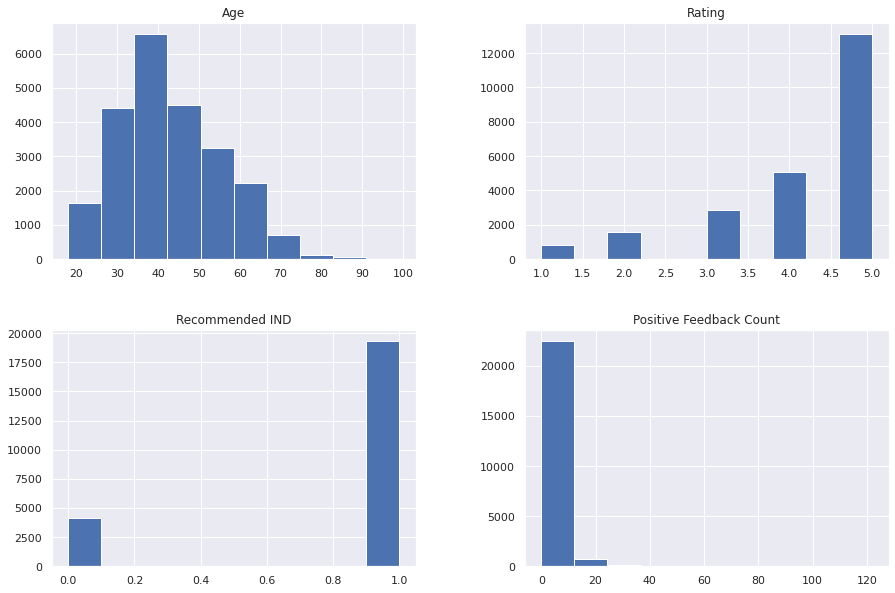

In [31]:
# Histograms
df1.hist(figsize=(15,10))

- We can clearly see from our histograms, that customers mostly rated our products high and that are happy with our products. The most frequent age of customers is somewhere between the age of 30-50. To have better idea, we will dig a bit more deeper.

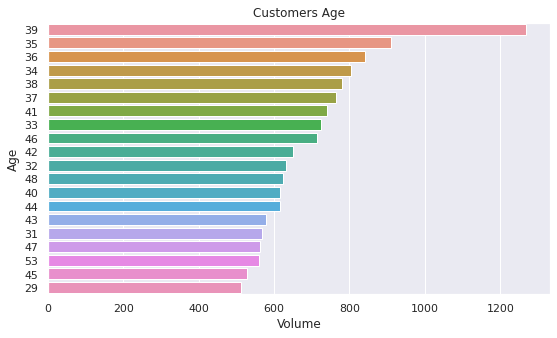

In [32]:
# Ascending order of Age of our Customers
age_order = df1['Age'].value_counts().head(20).index
plt.figure(figsize=(9, 5))
sns.countplot(data=df1, y='Age', order=age_order)
plt.title('Customers Age')
plt.xlabel('Volume')
plt.ylabel('Age');

In [33]:
# Frequency of the age
df1['Age'].value_counts()

39    1268
35     909
36     840
34     803
38     780
      ... 
93       2
90       2
86       2
99       2
92       1
Name: Age, Length: 77, dtype: int64

- 1268 of our customers are in the age of 39, followed by 35 with the frequency of 909 and on the third spot are customers in a age of 36 with the frequency of 840.

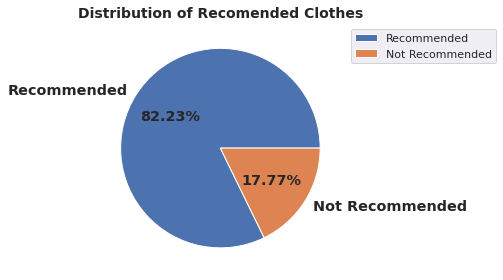

In [34]:
# Pie chart of distribution of Recommended Clothes
plt.figure(figsize = (6,4))
x = df1['Recommended IND'].value_counts()
labels = 'Recommended','Not Recommended'
plt.pie(x = x,  labels = labels,
        autopct = '%.2f%%', 
        textprops = {'size' : 'x-large',
                   'fontweight' : 'bold'})
plt.title('Distribution of Recomended Clothes', fontsize = 14, fontweight = 'bold')
plt.legend(labels, loc="upper left", bbox_to_anchor = (1,1))
plt.tight_layout()
plt.show()

- This pie chart shows us that 82.23% of are customers would recommended our brand

In [35]:
# Checking how many clothing items our feature has
df1['Class Name'].unique().shape

(20,)

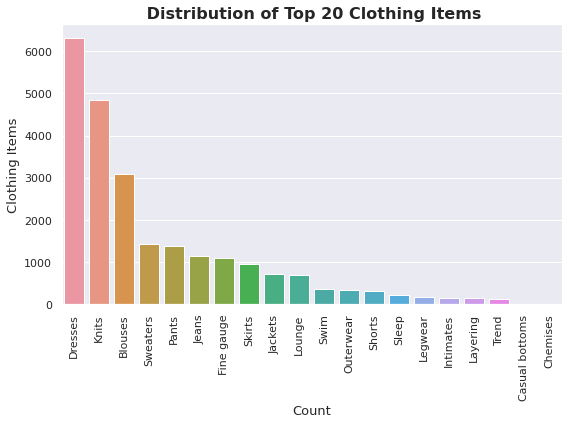

In [36]:
# Ascdening order of our most !!!!SELLING!!!!!! items
plt.figure(figsize=(8,6))
ax = sns.countplot(x='Class Name', data = df1, 
                   order = df1['Class Name'].value_counts().index[:20])
plt.title(' Distribution of Top 20 Clothing Items', fontsize = 16, fontweight = 'bold')
plt.xlabel('Count', fontsize = 13)
plt.xticks(rotation=90)
plt.ylabel('Clothing Items', fontsize = 13)
plt.tight_layout()
plt.show()

- From our graph we can see that our mose selling items are Dresses, Knits and Blouses as the top 3, followed by Sweaters and pants as our top 5

In [37]:
# Top 5 of our selling items
top5 = df1['Class Name'].value_counts().index[:5]
top5

Index(['Dresses', 'Knits', 'Blouses', 'Sweaters', 'Pants'], dtype='object')

Text(0.5, 1.0, 'Ratings of the clothes')

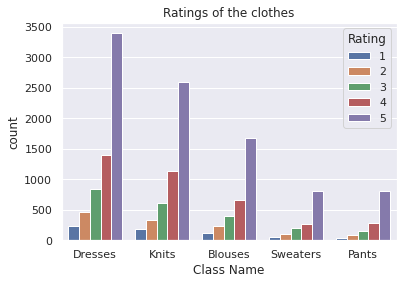

In [38]:
# Ratings of our top 5 items
sns.countplot(x="Class Name", hue="Rating", data=df1,
              order = df1['Class Name'].value_counts().index[:5])
sns.set(rc={'figure.figsize':(20,10)})
plt.title("Ratings of the clothes")

- We can clearly see that all the top 5 items are rating extremely positively, compare to the lowest point

In [39]:
df_cat = df1[['Class Name']]

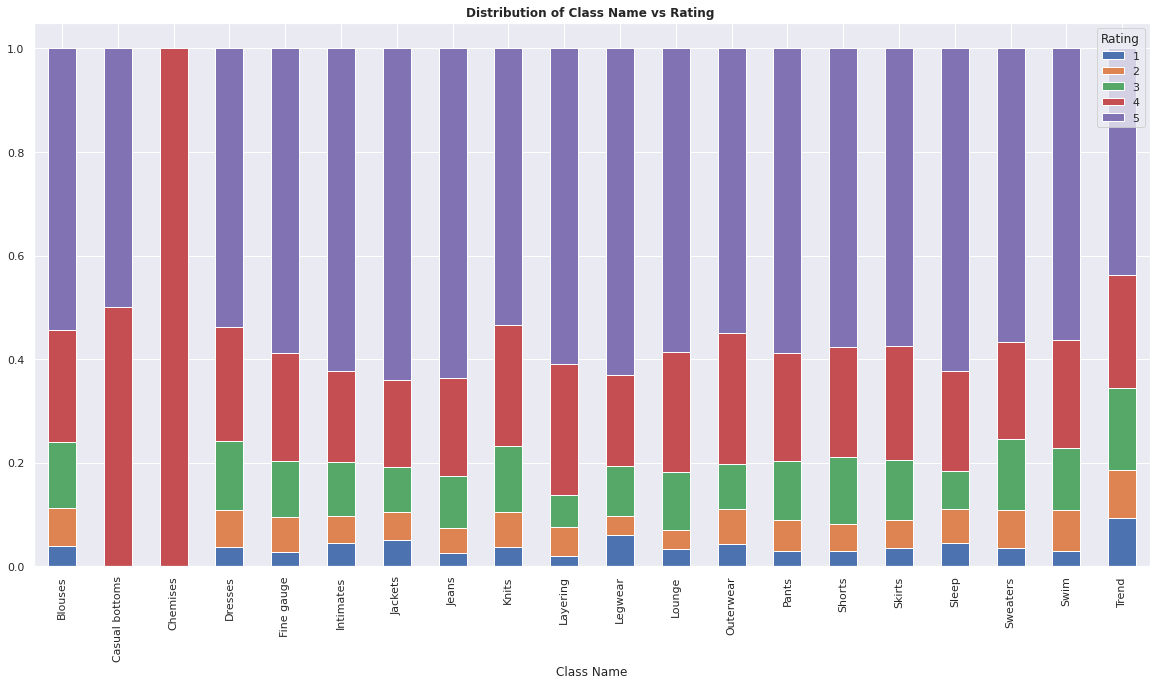

In [40]:
# Stacked bar visualization
for x in df_cat:
    y = pd.crosstab(df1[x],df1['Rating'])
    y.div(y.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
    plt.title("Distribution of {} vs Rating ".format(x), fontsize=12, fontweight='bold')

In [41]:
df1['Positive Feedback Count'].value_counts()

0      11165
1       4041
2       2193
3       1433
4        922
       ...  
94         1
117        1
71         1
84         1
59         1
Name: Positive Feedback Count, Length: 82, dtype: int64

In [42]:
df1['Positive Feedback Count'].unique().shape

(82,)

## Correlation between each variable

Text(0.5, 1.0, 'Correlation between different variables')

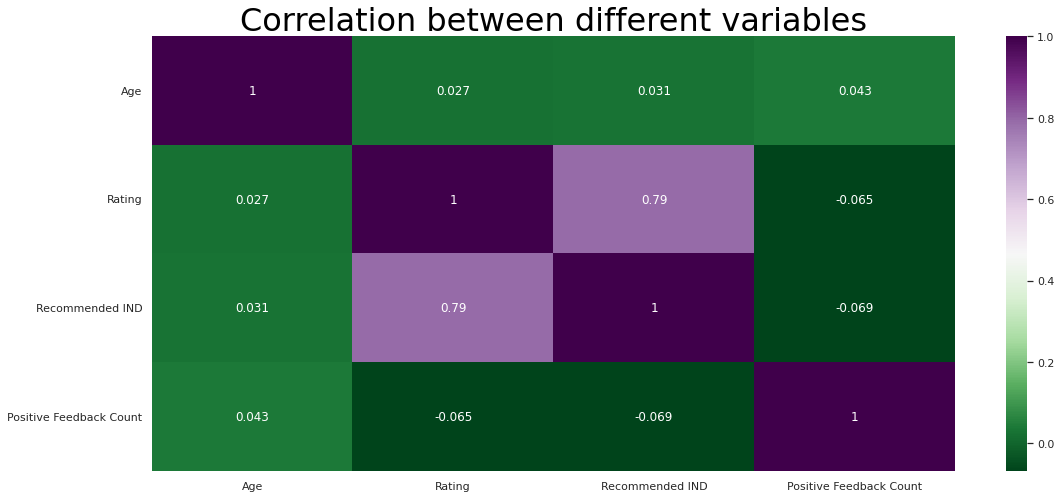

In [43]:
# Visualizating correlation between variables
fig, ax = plt.subplots(figsize=(18,8))    
sns.heatmap(df1.corr() ,annot=True ,cmap='PRGn_r')
plt.title('Correlation between different variables', fontsize = 32, c='black')

- We can see that there is correlation between Rating and Recommended IND. However, on the other hand, age doesn't play a big role when it comes to rating of the product.

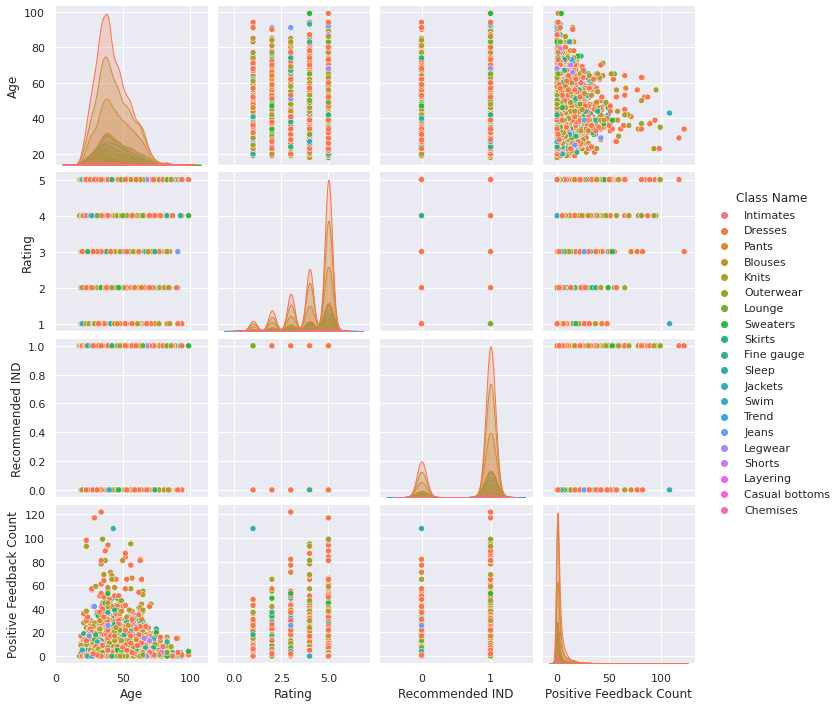

In [44]:
sns.pairplot(df1, hue = 'Class Name')


### Reviewing Text Lenght, Age and Sentiment Correlations

In [45]:
data['Review Text']

0        Absolutely wonderful - silky and sexy and comf...
1        Love this dress!  it's sooo pretty.  i happene...
2        I had such high hopes for this dress and reall...
3        I love, love, love this jumpsuit. it's fun, fl...
4        This shirt is very flattering to all due to th...
                               ...                        
23481    I was very happy to snag this dress at such a ...
23482    It reminds me of maternity clothes. soft, stre...
23483    This fit well, but the top was very see throug...
23484    I bought this dress for a wedding i have this ...
23485    This dress in a lovely platinum is feminine an...
Name: Review Text, Length: 23486, dtype: object

In [46]:
data

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [47]:
df1.head()

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Class Name
0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Intimates
1,34,Love this dress! it's sooo pretty. i happene...,5,1,4,Dresses
2,60,I had such high hopes for this dress and reall...,3,0,0,Dresses
3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,Pants
4,47,This shirt is very flattering to all due to th...,5,1,6,Blouses


In [48]:
new_df.head()

,Clothing ID,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [49]:
#df_new.head()

In [50]:
#sns.histplot(data=df_new, x=df_new['Review Text Lenght'], color="skyblue", label="Review Text Lenght", kde=True)
#plt.legend() 
#plt.show()

In [51]:
#sns.histplot(data=df_new, x=df_new['Sentiment'], color="teal", label="Review Text Lenght", kde=True)
#plt.legend() 
#plt.show()

In [52]:
#sns.histplot(data=df_new, x=df_new['Age'], color="red", label="Review Text Lenght", kde=True)
#plt.legend() 
#plt.show()

In [53]:
#sns.lmplot(x='Review Text Lenght', y='Age', hue='Sentiment', data=df_new,markers=["o", "x", "+"], palette="Set1");
#plt.show()

In [54]:
#sns.lmplot(x='Review Text Lenght', y='Age', hue='Sentiment', data=df_new, x_estimator=np.mean);
#plt.show()

### Conclusion

- There doesnt appear to be any direct correclation between sentiment and age group.
- There doesnt appear to be any direct correlation between sentiment and review text lenght.
- There doesnt appear to be any direct correlation between age and review text lenght.

Each category represents a wide range. The only noticeable trend is that majority of reviews are left by age groups of between 25-65 years old. This represents the range of shoppers we would expect the business to have and there is no noticeable correlations between these three features. 

# Data Preparation

## Checking for outliers

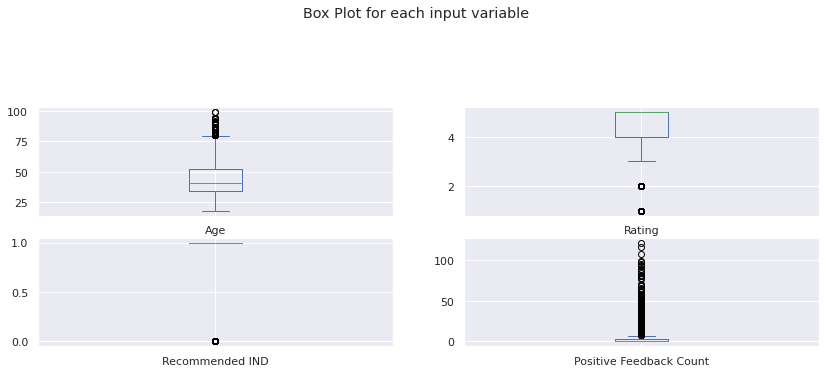

In [55]:
df1.plot(kind='box', subplots=True, layout=(6,2), sharex=False, sharey=False, figsize=(14,14), title='Box Plot for each input variable')
plt.show()

- Even though we can see that our dataset does have quite a lot outliers, they are all important and relatable (e.g. Age, Rating, etc), therefore we will keep it as it is.

In [56]:
df1

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Class Name
0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Intimates
1,34,Love this dress! it's sooo pretty. i happene...,5,1,4,Dresses
2,60,I had such high hopes for this dress and reall...,3,0,0,Dresses
3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,Pants
4,47,This shirt is very flattering to all due to th...,5,1,6,Blouses
...,...,...,...,...,...,...
23481,34,I was very happy to snag this dress at such a ...,5,1,0,Dresses
23482,48,"It reminds me of maternity clothes. soft, stre...",3,1,0,Knits
23483,31,"This fit well, but the top was very see throug...",3,0,1,Dresses
23484,28,I bought this dress for a wedding i have this ...,3,1,2,Dresses


- In our data preparation, there are a few steps to follow such as scaling and encoding our data, as well as perform feature engineering. The last thing we need to do is to split our data and then we should be ready for the next part, which is machine learning.

In [57]:
df1.isna().sum()

Age                        0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Class Name                 0
dtype: int64

## Feature engineering

- We need to find the lenght of the review text

In [58]:
# Adding a review text word count feature
df1["Review Text Lenght"] = df1['Review Text'].str.len()
df1

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Class Name,Review Text Lenght
0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Intimates,53
1,34,Love this dress! it's sooo pretty. i happene...,5,1,4,Dresses,303
2,60,I had such high hopes for this dress and reall...,3,0,0,Dresses,500
3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,Pants,124
4,47,This shirt is very flattering to all due to th...,5,1,6,Blouses,192
...,...,...,...,...,...,...,...
23481,34,I was very happy to snag this dress at such a ...,5,1,0,Dresses,131
23482,48,"It reminds me of maternity clothes. soft, stre...",3,1,0,Knits,223
23483,31,"This fit well, but the top was very see throug...",3,0,1,Dresses,208
23484,28,I bought this dress for a wedding i have this ...,3,1,2,Dresses,427


- We need to have an understanding of sentiment when reviews are being left by customer.
- We will create a new feature called Sentiment which will represent if a rating is positive or negative.

In [59]:
df1['Sentiment'] = df1['Rating'].map({5:2, 4:2, 3:1, 2:0, 1:0 })
df1

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Class Name,Review Text Lenght,Sentiment
0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Intimates,53,2
1,34,Love this dress! it's sooo pretty. i happene...,5,1,4,Dresses,303,2
2,60,I had such high hopes for this dress and reall...,3,0,0,Dresses,500,1
3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,Pants,124,2
4,47,This shirt is very flattering to all due to th...,5,1,6,Blouses,192,2
...,...,...,...,...,...,...,...,...
23481,34,I was very happy to snag this dress at such a ...,5,1,0,Dresses,131,2
23482,48,"It reminds me of maternity clothes. soft, stre...",3,1,0,Knits,223,1
23483,31,"This fit well, but the top was very see throug...",3,0,1,Dresses,208,1
23484,28,I bought this dress for a wedding i have this ...,3,1,2,Dresses,427,1


- 2 for Positive
- 1 for Neutral
- 0 for Negative

## Encoding Data

- We need to use label encoder for the class name before running it through the model

In [60]:
# Data Encoding
df_new = df1[['Review Text Lenght', 'Class Name', 'Age', 'Recommended IND', 'Positive Feedback Count', 'Rating', 'Sentiment']]
df_new

,Review Text Lenght,Class Name,Age,Recommended IND,Positive Feedback Count,Rating,Sentiment
0,53,Intimates,33,1,0,4,2
1,303,Dresses,34,1,4,5,2
2,500,Dresses,60,0,0,3,1
3,124,Pants,50,1,0,5,2
4,192,Blouses,47,1,6,5,2
...,...,...,...,...,...,...,...
23481,131,Dresses,34,1,0,5,2
23482,223,Knits,48,1,0,3,1
23483,208,Dresses,31,0,1,3,1
23484,427,Dresses,28,1,2,3,1


## Label Encoding

In [61]:
# Importing Library
from sklearn.preprocessing import LabelEncoder

In [62]:
# Running the label encoder 
le = LabelEncoder()

df_new['Class Name'] = le.fit_transform(df_new['Class Name'])
df_new

,Review Text Lenght,Class Name,Age,Recommended IND,Positive Feedback Count,Rating,Sentiment
0,53,5,33,1,0,4,2
1,303,3,34,1,4,5,2
2,500,3,60,0,0,3,1
3,124,13,50,1,0,5,2
4,192,0,47,1,6,5,2
...,...,...,...,...,...,...,...
23481,131,3,34,1,0,5,2
23482,223,8,48,1,0,3,1
23483,208,3,31,0,1,3,1
23484,427,3,28,1,2,3,1


In [63]:
# How the Class Name was mapped
dict(zip(le.classes_,range(len(le.classes_))))

{'Blouses': 0,
 'Casual bottoms': 1,
 'Chemises': 2,
 'Dresses': 3,
 'Fine gauge': 4,
 'Intimates': 5,
 'Jackets': 6,
 'Jeans': 7,
 'Knits': 8,
 'Layering': 9,
 'Legwear': 10,
 'Lounge': 11,
 'Outerwear': 12,
 'Pants': 13,
 'Shorts': 14,
 'Skirts': 15,
 'Sleep': 16,
 'Sweaters': 17,
 'Swim': 18,
 'Trend': 19}

- There is no need for us to impute the data as they are all in the same range

## Splitting our dataset

- The very last thing for us to do is the split our dataset and then we are ready to run some machine learning algoritms

In [64]:
df_new

,Review Text Lenght,Class Name,Age,Recommended IND,Positive Feedback Count,Rating,Sentiment
0,53,5,33,1,0,4,2
1,303,3,34,1,4,5,2
2,500,3,60,0,0,3,1
3,124,13,50,1,0,5,2
4,192,0,47,1,6,5,2
...,...,...,...,...,...,...,...
23481,131,3,34,1,0,5,2
23482,223,8,48,1,0,3,1
23483,208,3,31,0,1,3,1
23484,427,3,28,1,2,3,1


# Machine Learning

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.model_selection import GridSearchCV

In [66]:
# Initializing empty lists to store results for visualization & comparison of model results
Label = []
Test = []
Train = []
Std = []
Cfm = []

In [67]:
# Feature Selection
X = df_new.iloc[:, :-1].values
y = df_new.iloc[:, -1].values

In [68]:
df.head()

,Clothing ID,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


 
0.05 % Split
 
Testing accuracy =  0.8901192504258943
Training accuracy =  0.8886895685711723
Standard Deviation =  -0.0014296818547220314
 
              precision    recall  f1-score   support

           0       0.97      0.78      0.86       118
           1       0.56      0.45      0.50       137
           2       0.92      0.97      0.94       919

    accuracy                           0.89      1174
   macro avg       0.82      0.73      0.77      1174
weighted avg       0.88      0.89      0.88      1174

AxesSubplot(0.125,0.125;0.775x0.755)


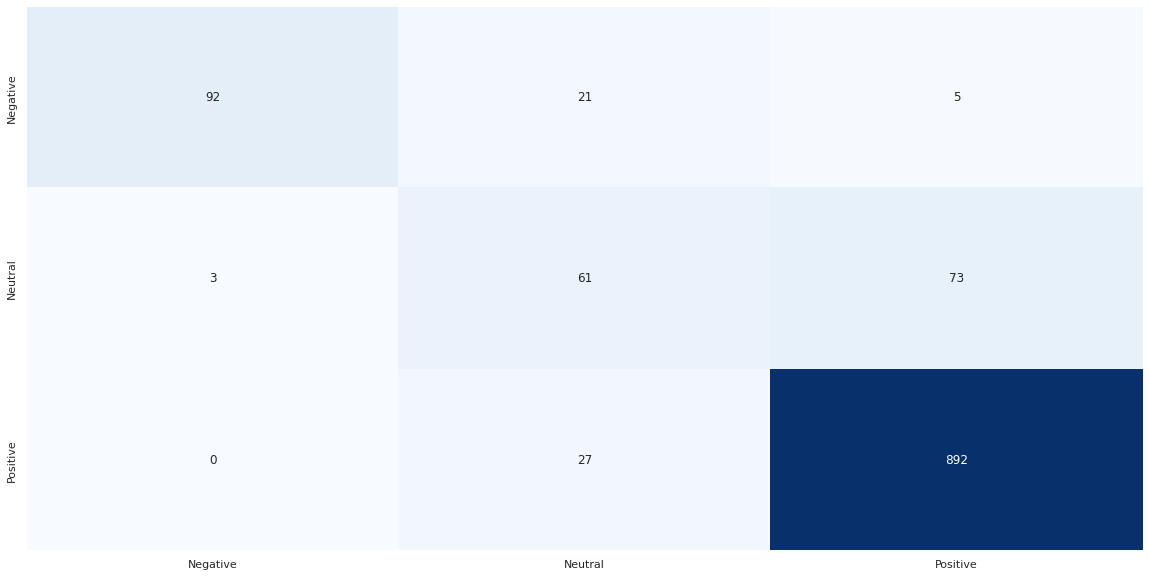

__ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __
 
 
0.1 % Split
 
Testing accuracy =  0.8816013628620102
Training accuracy =  0.8827873508805151
Standard Deviation =  0.001185988018504891
 
              precision    recall  f1-score   support

           0       0.87      0.71      0.78       251
           1       0.51      0.40      0.45       274
           2       0.92      0.98      0.95      1823

    accuracy                           0.88      2348
   macro avg       0.77      0.69      0.73      2348
weighted avg       0.87      0.88      0.87      2348

AxesSubplot(0.125,0.125;0.775x0.755)


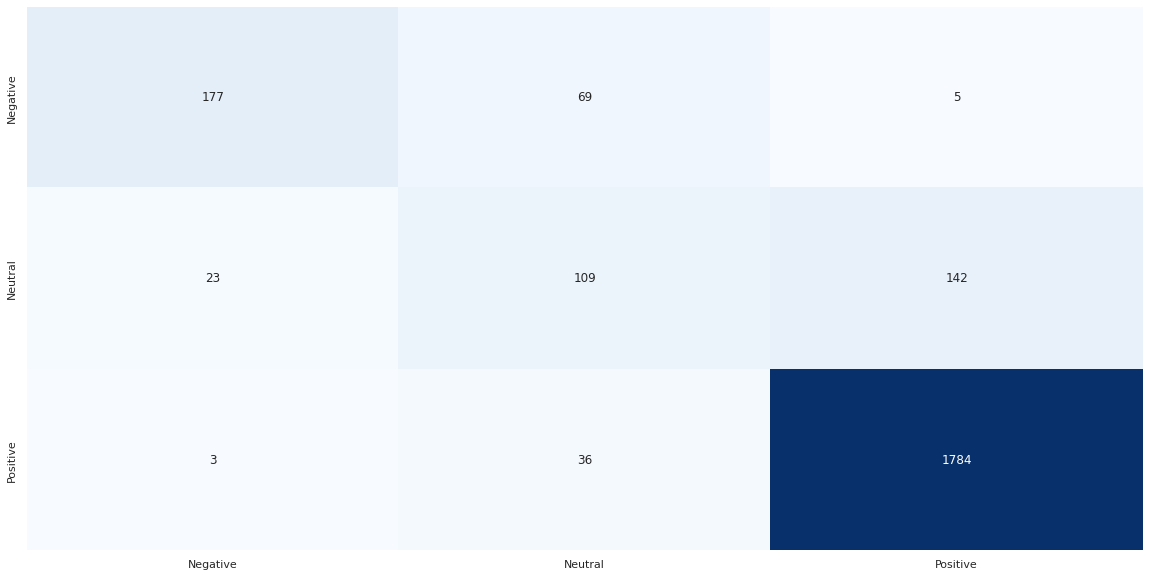

__ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __
 
 
0.15 % Split
 
Testing accuracy =  0.8866799204771372
Training accuracy =  0.8849681720214525
Standard Deviation =  -0.0017117484556846696
 
              precision    recall  f1-score   support

           0       0.89      0.74      0.81       368
           1       0.57      0.44      0.50       432
           2       0.92      0.98      0.95      2721

    accuracy                           0.89      3521
   macro avg       0.79      0.72      0.75      3521
weighted avg       0.88      0.89      0.88      3521

AxesSubplot(0.125,0.125;0.775x0.755)


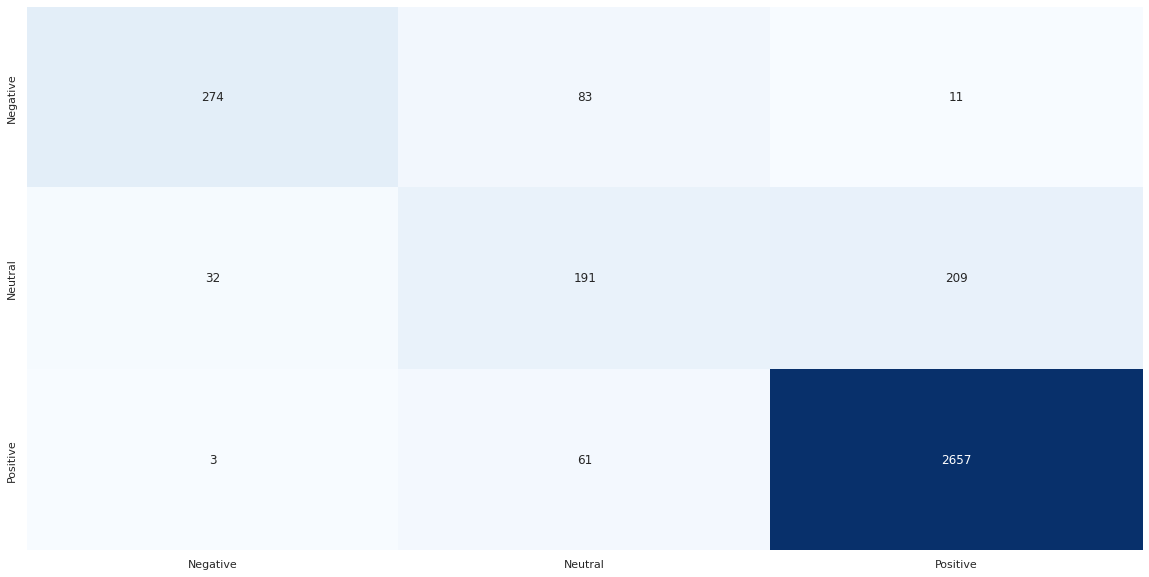

__ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __
 
 
0.2 % Split
 
Testing accuracy =  0.8930777422790203
Training accuracy =  0.8942323054801087
Standard Deviation =  0.001154563201088421
 
              precision    recall  f1-score   support

           0       0.86      0.81      0.83       490
           1       0.61      0.47      0.53       595
           2       0.93      0.97      0.95      3610

    accuracy                           0.89      4695
   macro avg       0.80      0.75      0.77      4695
weighted avg       0.88      0.89      0.89      4695

AxesSubplot(0.125,0.125;0.775x0.755)


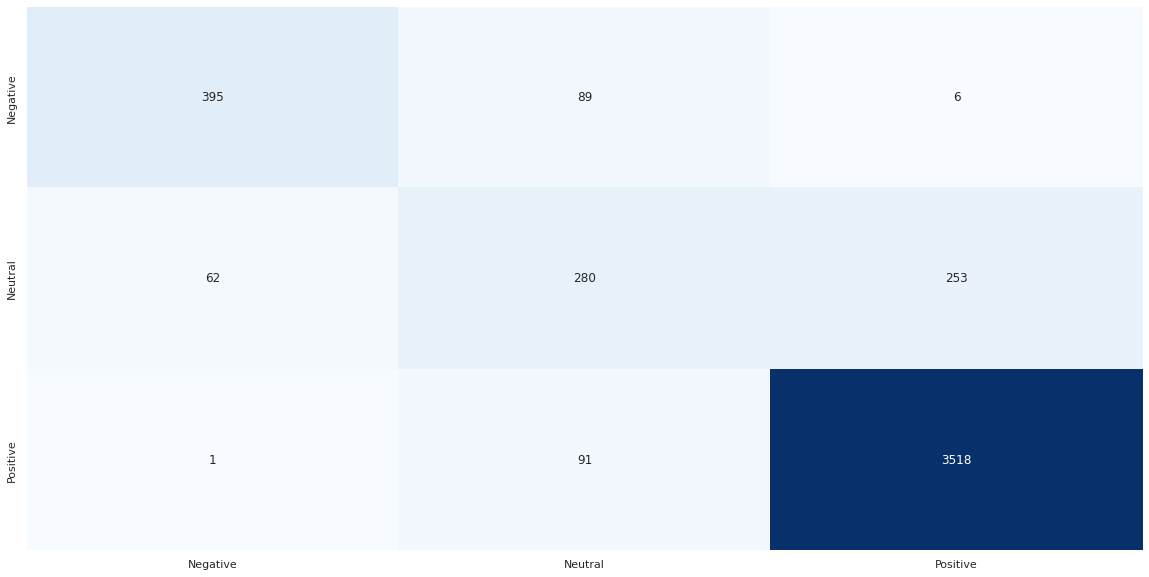

__ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __
 
 
0.25 % Split
 
Testing accuracy =  0.8866734832992502
Training accuracy =  0.8871279254714838
Standard Deviation =  0.0004544421722335601
 
              precision    recall  f1-score   support

           0       0.93      0.72      0.81       604
           1       0.57      0.44      0.50       721
           2       0.92      0.98      0.95      4543

    accuracy                           0.89      5868
   macro avg       0.80      0.71      0.75      5868
weighted avg       0.88      0.89      0.88      5868

AxesSubplot(0.125,0.125;0.775x0.755)


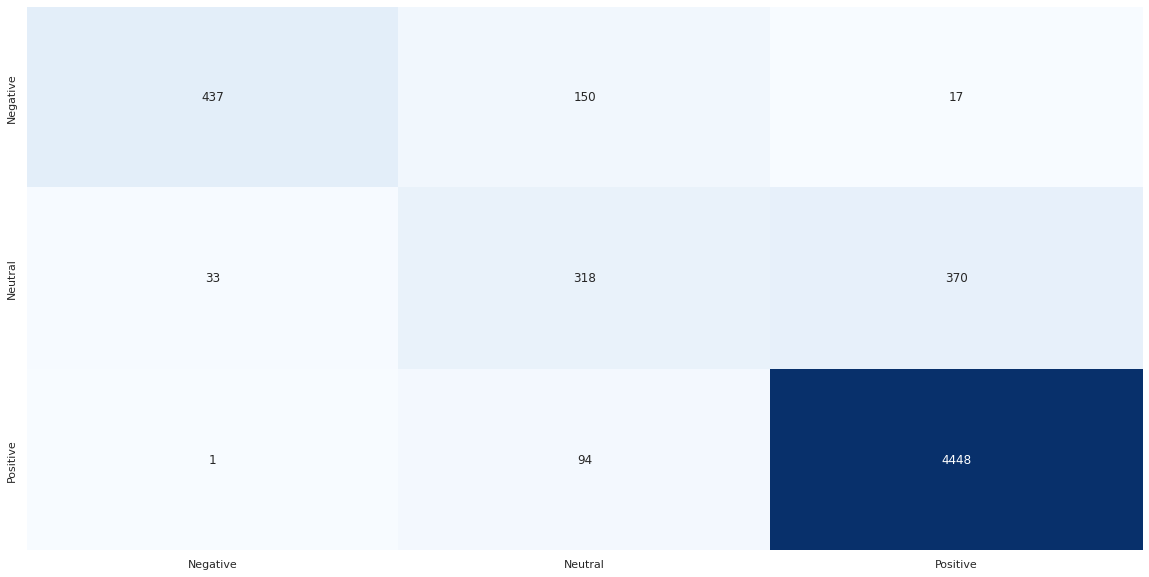

__ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __
 
 
0.3 % Split
 
Testing accuracy =  0.8794376597557512
Training accuracy =  0.8834449178332319
Standard Deviation =  0.004007258077480702
 
              precision    recall  f1-score   support

           0       0.83      0.73      0.78       718
           1       0.55      0.37      0.44       871
           2       0.92      0.98      0.95      5453

    accuracy                           0.88      7042
   macro avg       0.77      0.69      0.72      7042
weighted avg       0.86      0.88      0.87      7042

AxesSubplot(0.125,0.125;0.775x0.755)


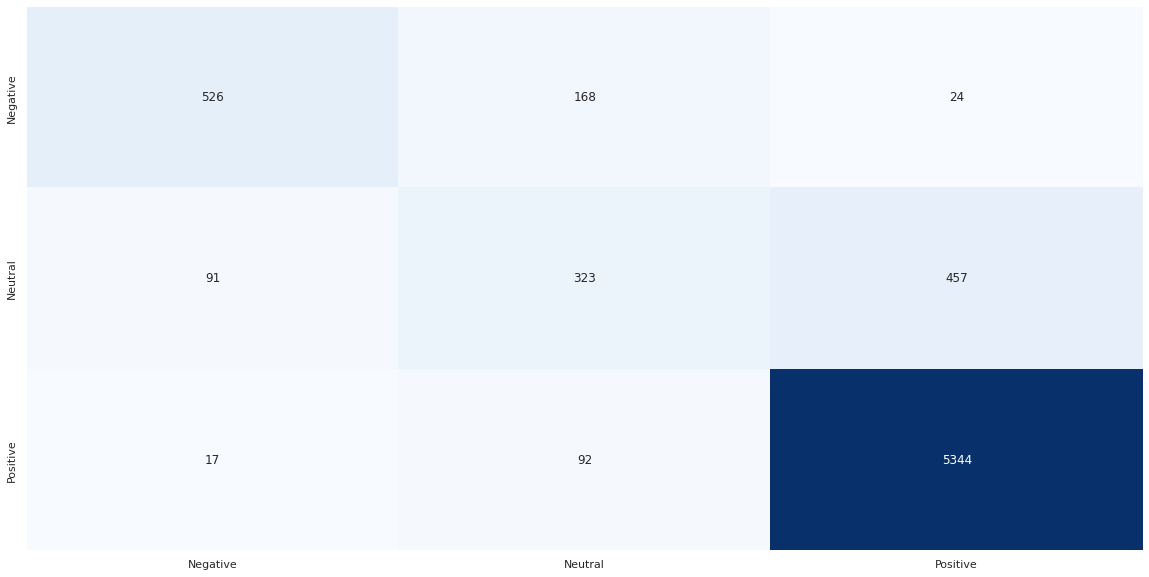

__ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __
 


In [69]:
# Storing the split data into a list to test all split sizes and compare results to find optimal split size
test_range = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]


for i,t in enumerate(test_range[0:]):
    
    print(" ")
    print(t , "% Split")
    print(" ")
    # Splitting + fitting data to model
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t, random_state=1, shuffle=True)
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    
    # Results 
    lr_test = metrics.accuracy_score(y_test, logreg.predict(X_test))
    print("Testing accuracy = ",lr_test)  
    lr_train = metrics.accuracy_score(y_train, logreg.predict(X_train))
    print("Training accuracy = ",lr_train)
    lr_std = lr_train - lr_test
    print("Standard Deviation = ", lr_std)
    
    # Append results to list
    Label.append(str(int(t*100)) + '% Split')
    Test.append(lr_test)
    Train.append(lr_test)
    Std.append(lr_std)
    

    # Scoring Confusion Matrix Function
    # Iterate through confusion matrix, every 4th cell is positive prediction and the others are errors
    predicted_values = logreg.predict(X_test)    
    ex = pd.DataFrame(confusion_matrix(y_test, predicted_values))
    count = 0
    score = 0
    for i in range(ex.shape[0]): #iterate over rows
        for j in range(ex.shape[1]): #iterate over columns
            if count == 0:
                score = score + int(ex.at[i, j]) # add cell value
                count = 3
            else: 
                score = score - int(ex.at[i, j]) # minus cell value
                count -= 1
    
    cfm_final =  (score / len(y_test)) * 100
    Cfm.append(float('%.2f' % cfm_final))
        
        
    # Printing Results
    print(" ")
    print(classification_report(y_test, predicted_values))
    print(sns.heatmap(confusion_matrix(y_test, predicted_values), annot=True, fmt='0.4g',                 
                 xticklabels=['Negative','Neutral', 'Positive'],                
                 yticklabels=['Negative','Neutral', 'Positive'],                  
                 cbar=False, cmap='Blues'))

    plt.show()
    
    print("__ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __")
    print(" ")

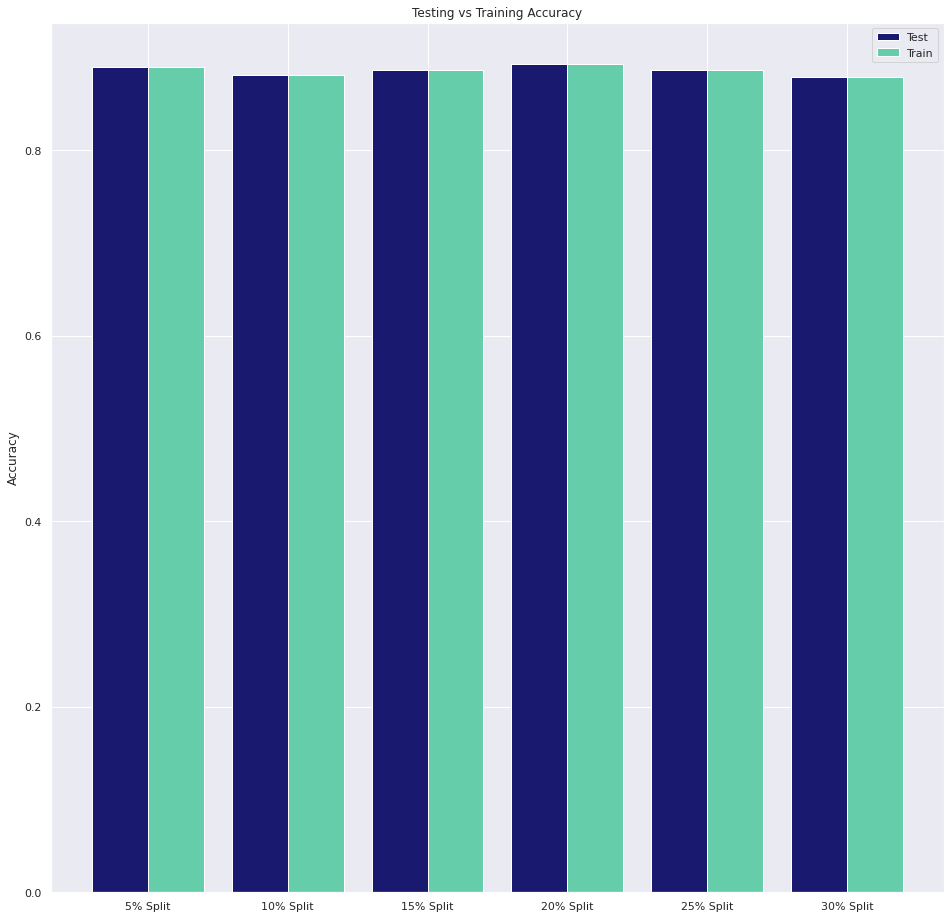

In [70]:
# Plotting Testing vs. Training Results

f, ax = plt.subplots(figsize=(16,16)) 
X_axis = np.arange(len(Label))
plt.bar(X_axis - 0.2,Test, 0.4, label = 'Test', color=('midnightblue'))
plt.bar(X_axis + 0.2,Train, 0.4, label = 'Train', color=('mediumaquamarine'))

plt.xticks(X_axis, Label)
plt.ylabel("Accuracy")
plt.title("Testing vs Training Accuracy")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Percentage Deviation in Testing Data vs. Training Data')

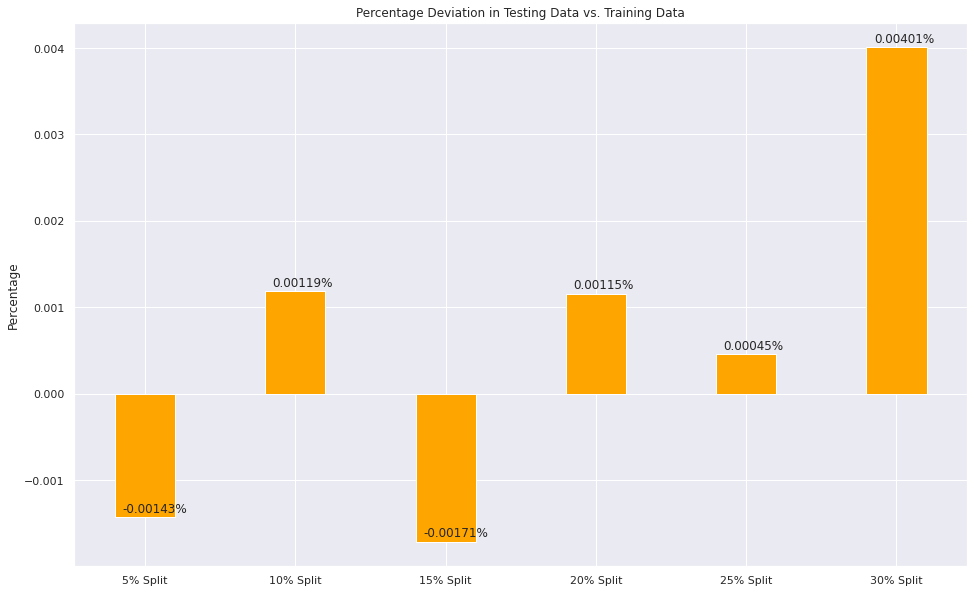

In [71]:
f, ax = plt.subplots(figsize=(16,10)) 
plt.bar(X_axis, Std, 0.4, label = 'std', color=('orange'))

for i, v in enumerate(Std):
    plt.text( i - 0.15, v + 0.0001, str(round(v, 5)) + "%", va="center")

plt.xticks(X_axis, Label)
plt.ylabel("Percentage")
plt.title("Percentage Deviation in Testing Data vs. Training Data")

- From the results we can see that the 20% split scored the highest accuracy in the testing and training set.
- The orange plot highlights the deviation in the data from the testing and training results. We can see that a 15% split scored the lowest deviation while 20% scored the highest. This might suggest that the 20% split size might be suffering from overfitting issues while a 15% split size is more capable of generalizing to new data from the testing set.
- In order to conclude the best split size I will need to observe view the confusion matrix and score the results.

### Confusion Matrix Error Scoring

- The scoring system is simple. Each succesful prediction is +1 point, an error is -1 point
- As each testing size varies in size ie: 5% vs 25%  testing sample size, the final score will need to be scored as a percentage of its overall sample size so as to not bias a larger sample size score.
- Our scoring system does not have any bias for type I or type II error. This is because we just want to predict the sentiment correctly, we are not looking to maximize a specific dependant feature.

Text(0.5, 1.0, 'Confusion Matrix Score (Higher is better)')

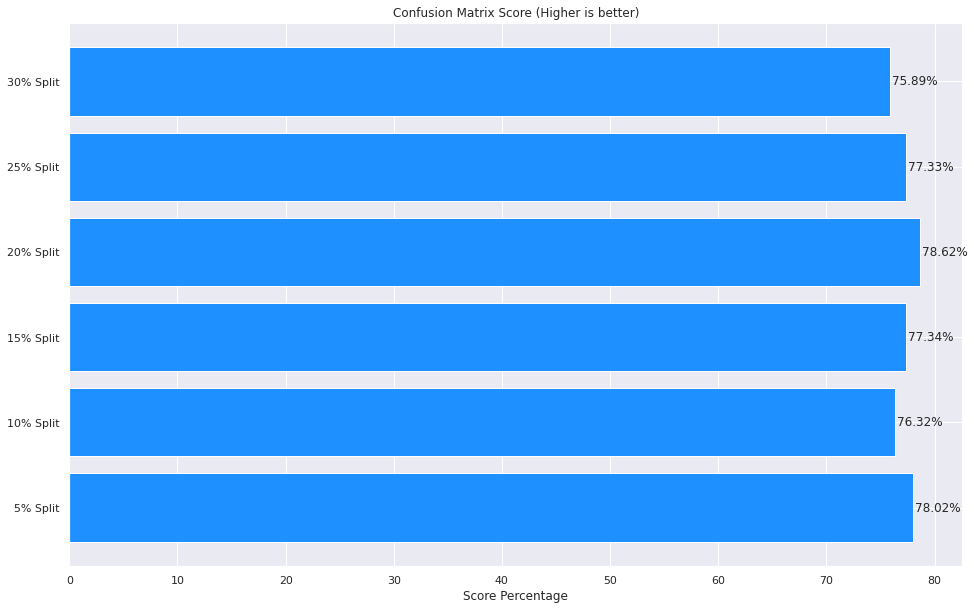

In [72]:
# Confusion Matrix Score converted to an accuracy score based on percentage of its testing size 
# Each testing group varies in size. I cannot compare a pure score value of a smaller testing sample size to a larger sample size.
# As such I take their score and divide it by the total size of the testing sample size and multiply by 100 for a percentage score value

f, ax = plt.subplots(figsize=(16,10)) 
ax.barh(X_axis, Cfm, color=('dodgerblue'))

for i, v in enumerate(Cfm):
    plt.text(v+0.2, i , str(round(v, 2)) + "%", va="center")


plt.yticks(X_axis, Label)
plt.xlabel("Score Percentage")
plt.title("Confusion Matrix Score (Higher is better)")

- The results indicate that 20% split would be optimal due to higher accuracy. while it may represent the results with the highest standard deviation between testing and training set results these results are marginal at only 0.0047%.
- 20% test split also scored the highest confusion matrix score value, this is to be expected as we did not bias any type I or type II errors.

### Cross Validation

In [73]:
# Performing Cross validation
# Cross validation score (Logistic Regression)
score = cross_val_score(logreg, X, y, cv=7)
print('Cross validation score: ',score)

Cross validation score:  [0.887  0.8822 0.8786 0.8813 0.8914 0.8956 0.8813]


In [74]:
# Mean accuracy score
score.mean()

0.8853526905288952

</br>

### Optimizing Model

In [75]:
# initialising lists of hyperparameters to test for the optimal settings
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
penalty = ['none','l1','l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

In [76]:
# Using GridSearchCV to test for hyperparameter setting
grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid_search = GridSearchCV(estimator=logreg, param_grid=grid, n_jobs=-1, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

In [77]:
# Printing out the optimal hyperparameters
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

Best: 1.000000 using {'C': 100, 'penalty': 'none', 'solver': 'newton-cg'}


### Run The Optimized Model

In [78]:
# Initialise logreg model with optimised hyperparameters & fitting the data
logreg = LogisticRegression(C=100, penalty='none', solver='newton-cg')
logreg.fit(X_train, y_train)

# Generating prediction
predicted_values = logreg.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       718
           1       1.00      1.00      1.00       871
           2       1.00      1.00      1.00      5453

    accuracy                           1.00      7042
   macro avg       1.00      1.00      1.00      7042
weighted avg       1.00      1.00      1.00      7042

AxesSubplot(0.125,0.125;0.775x0.755)


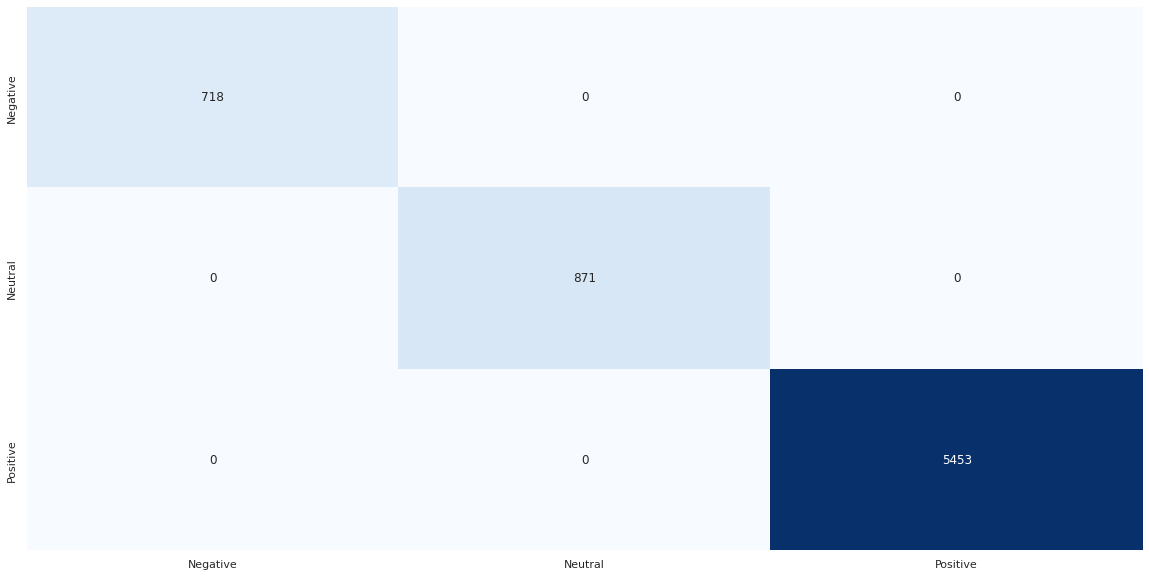

In [79]:
print(classification_report(y_test, predicted_values))
print(sns.heatmap(confusion_matrix(y_test, predicted_values), annot=True, fmt='.4g',                 
                 xticklabels=['Negative','Neutral', 'Positive'],                
                 yticklabels=['Negative','Neutral', 'Positive'],                  
                 cbar=False, cmap='Blues'))

In [80]:
#Print Train Accuracy
lr_train_accuracy = metrics.accuracy_score(y_train, logreg.predict(X_train))
print("Training accuracy = ",metrics.accuracy_score(y_train, logreg.predict(X_train)))

#Print Test Accuracy
lr_test_accuracy = metrics.accuracy_score(y_test, logreg.predict(X_test))
print("Testing accuracy = ",metrics.accuracy_score(y_test, logreg.predict(X_test)))

Training accuracy =  1.0
Testing accuracy =  1.0


In [81]:
# Performing Cross validation
# Cross validation score (Logistic Regression)
score = cross_val_score(logreg, X, y, cv=5)
print('Cross validation score: ',score)

Cross validation score:  [1. 1. 1. 1. 1.]


In [82]:
# Mean accuracy score
score.mean()

1.0

- Using optimal test sample size and optimizing the logistic regression model for the best hyperparameters we are able to achieve 100% accuracy with logistic regression. Allowing us to Accurately predict sentiment based on review feedback, irrespective of the content of the feedback itself.

#Macken - KMeans - What clusters are in our dataset?

1. Import Libraries 

In [83]:
import sklearn as sk
from sklearn.cluster import KMeans 

2 Load the data

3. Define X and Y variables - Explain what I am looking for with KMEANS

In [84]:
# Dropping columns that has no use to us
df_new = df_new.drop(['Rating'], axis=1)

In [85]:
X = df_new.iloc[:, :-1].values #keeping target 
y = df_new.iloc[:, -1].values

In [86]:
X

array([[ 53,   5,  33,   1,   0],
       [303,   3,  34,   1,   4],
       [500,   3,  60,   0,   0],
       ...,
       [208,   3,  31,   0,   1],
       [427,   3,  28,   1,   2],
       [110,   3,  52,   1,  22]])

In [87]:
y

array([2, 2, 1, ..., 1, 1, 2])

In [88]:
df_new.head()

,Review Text Lenght,Class Name,Age,Recommended IND,Positive Feedback Count,Sentiment
0,53,5,33,1,0,2
1,303,3,34,1,4,2
2,500,3,60,0,0,1
3,124,13,50,1,0,2
4,192,0,47,1,6,2


In [89]:
df_new.tail()

,Review Text Lenght,Class Name,Age,Recommended IND,Positive Feedback Count,Sentiment
23481,131,3,34,1,0,2
23482,223,8,48,1,0,1
23483,208,3,31,0,1,1
23484,427,3,28,1,2,1
23485,110,3,52,1,22,2


In [90]:
df_new.shape

(23472, 6)

In [91]:
df.head()

,Clothing ID,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


4. Let’s have a look at our data through a scatter plot


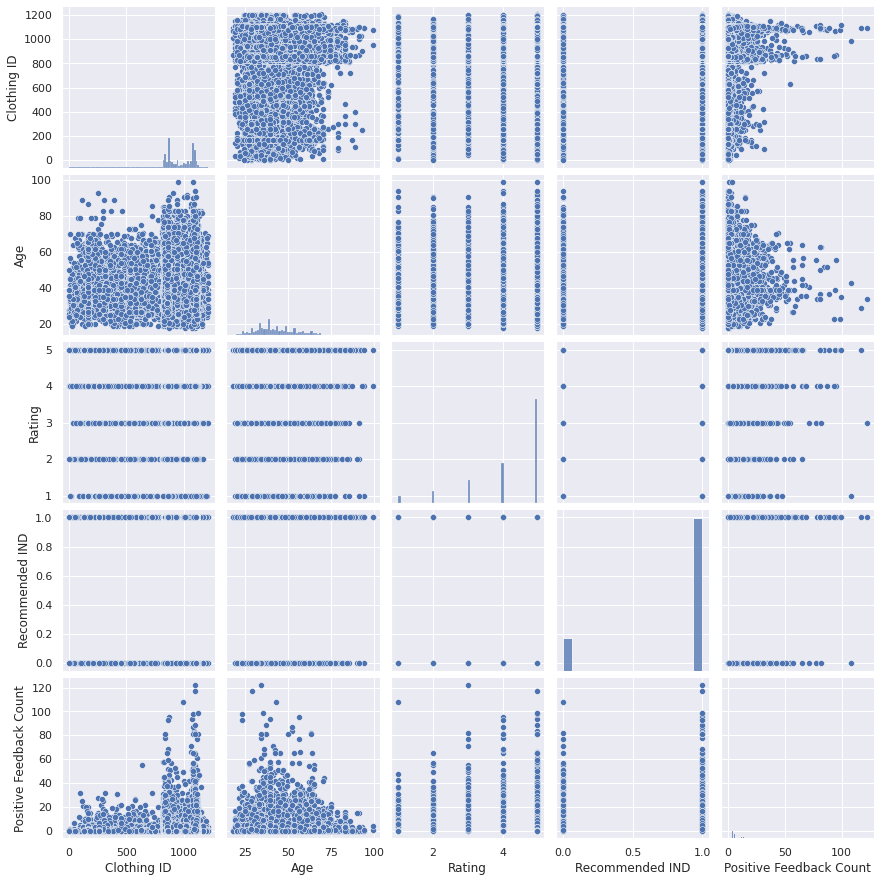

In [92]:
sns.pairplot(df)

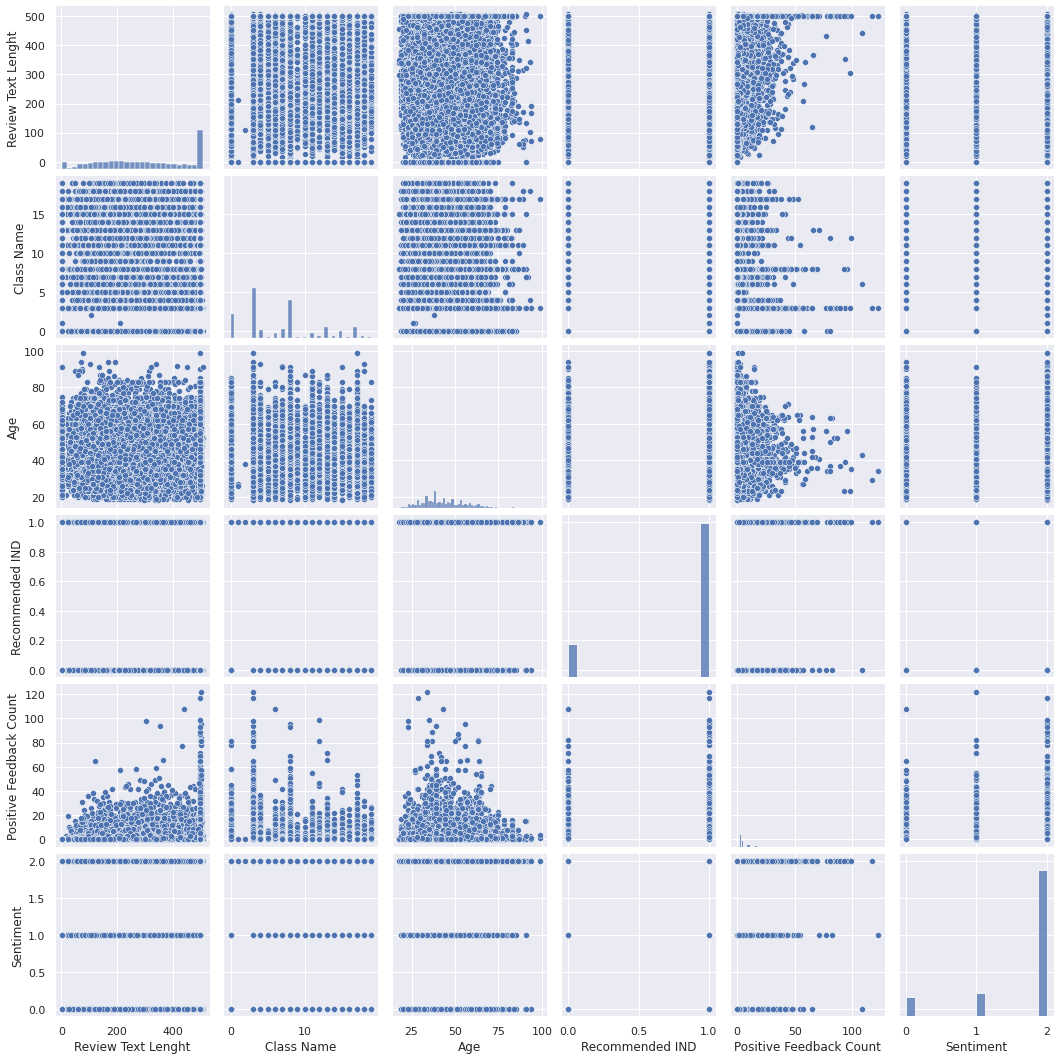

In [93]:
sns.pairplot(df_new)

4.1 Another plot 

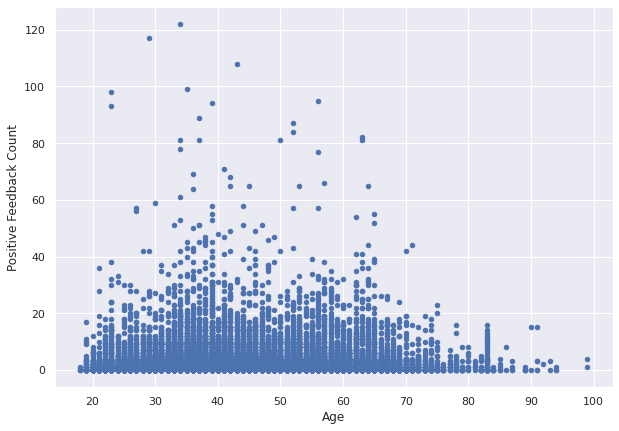

In [94]:
df1.plot(kind="scatter",
         x="Age",
         y="Positive Feedback Count",
         figsize=(10, 7))

plt.show()

6. Now, let’s instantiate and fit our K means cluster model. 
We are going to use three clusters and a random state of 21

Set the number of clusters for the KMeans algorithm - How many Clusters do we want? This is represented by K. 

6.1. randomly select K centers, one for each cluster of data. (clusters represented by K, K centers or centroid)

6.2. Assign each instance to closest centroid.

6.3. keeps doing it until centroids.

6.4. return to step 2.

6.5. End when the centroids no longer change 

In [95]:
df_new.head()

,Review Text Lenght,Class Name,Age,Recommended IND,Positive Feedback Count,Sentiment
0,53,5,33,1,0,2
1,303,3,34,1,4,2
2,500,3,60,0,0,1
3,124,13,50,1,0,2
4,192,0,47,1,6,2


In [96]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23472 entries, 0 to 23485
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Review Text Lenght       23472 non-null  int64
 1   Class Name               23472 non-null  int64
 2   Age                      23472 non-null  int64
 3   Recommended IND          23472 non-null  int64
 4   Positive Feedback Count  23472 non-null  int64
 5   Sentiment                23472 non-null  int64
dtypes: int64(6)
memory usage: 1.8 MB


In [97]:
df_new['Class Name']

0         5
1         3
2         3
3        13
4         0
         ..
23481     3
23482     8
23483     3
23484     3
23485     3
Name: Class Name, Length: 23472, dtype: int64

In [98]:
df_new.drop(['Class Name'], axis=1, inplace=True)

# How to decide number of clutsers for data
### Cluster Sum of Squares
One measurement is <b>Within Cluster Sum of Squares (WCSS)</b>, which measures the squared average distance of all the points within a cluster to the cluster centroid. To calculate WCSS, you first find the Euclidean distance between a given point and the centroid to which it is assigned.

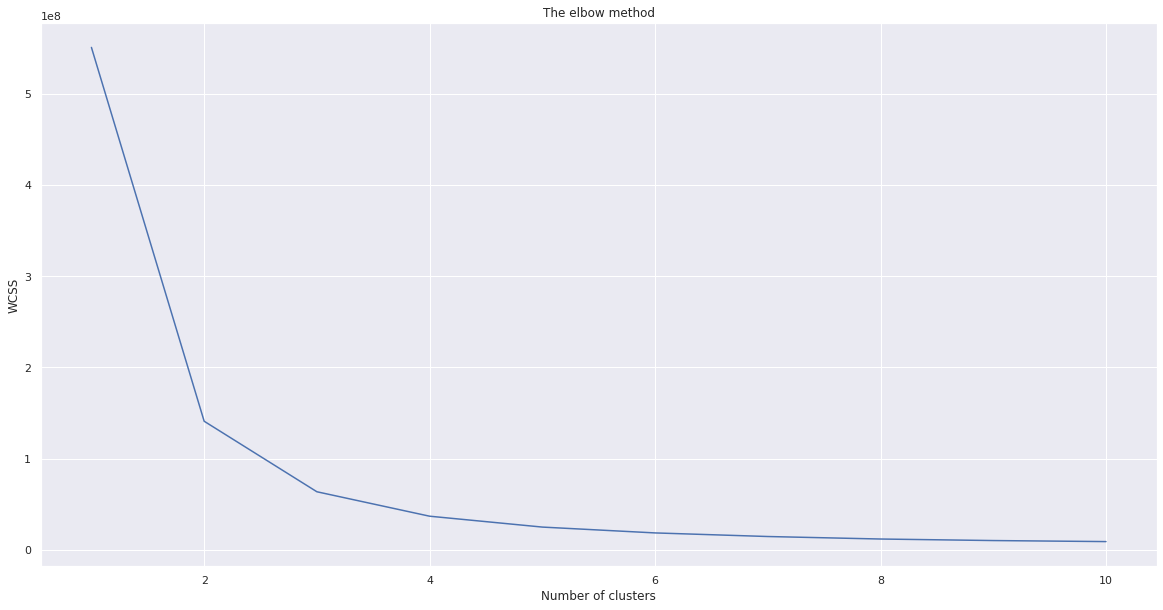

In [99]:
# Finding the optimum number of clusters for k-means classification #put in pipeline 
from sklearn.cluster import KMeans
wcss = []                  # Declare an array

# Set the loop from the minimum and maximum values
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init = 10, random_state = 0)  # Initialise an object kmeans by calling 
                                                                                    # an object KMeans()
    kmeans.fit(X)                                                                   # Training the model by calling fit() method
    wcss.append(kmeans.inertia_)                                                    # Store kmeans.inertia_ in the array wcss
# inertia_float: Sum of squared distances of samples to their closest cluster center.

# Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')    # within cluster sum of squares
plt.show()

#KNN

Cluster in the dataset 

In [100]:
X = df_new.iloc[:, :-1].values
y = df_new.iloc[:, -1].values

In [101]:
X

array([[ 53,  33,   1,   0],
       [303,  34,   1,   4],
       [500,  60,   0,   0],
       ...,
       [208,  31,   0,   1],
       [427,  28,   1,   2],
       [110,  52,   1,  22]])

In [102]:
y

array([2, 2, 1, ..., 1, 1, 2])

In [103]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [104]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)
print(X_test)

[[-1.2101  1.4407  0.4665 -0.2702]
 [-0.0804  1.3594  0.4665 -0.092 ]
 [-0.4942 -0.6718  0.4665  0.6208]
 ...
 [ 0.0837 -0.2655 -2.1438 -0.4484]
 [-1.3742 -1.4843  0.4665 -0.4484]
 [ 1.325   0.222   0.4665 -0.4484]]
[[ 0.4515 -0.103  -2.1438  0.6208]
 [ 1.325   0.7095  0.4665  0.2644]
 [ 1.3316 -1.4843  0.4665 -0.4484]
 ...
 [-0.6058 -0.0218  0.4665  0.0862]
 [ 0.3596  0.4657  0.4665 -0.092 ]
 [ 1.3316  0.9532  0.4665 -0.2702]]


In [105]:
# Training the K-NN model on the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [106]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [2 1]
 [2 2]
 ...
 [2 1]
 [2 2]
 [2 2]]


In [107]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 389,  176,   25],
       [ 263,  146,  295],
       [  39,   31, 4504]])

Text(0.5, 1.0, 'Predicted vs actual')

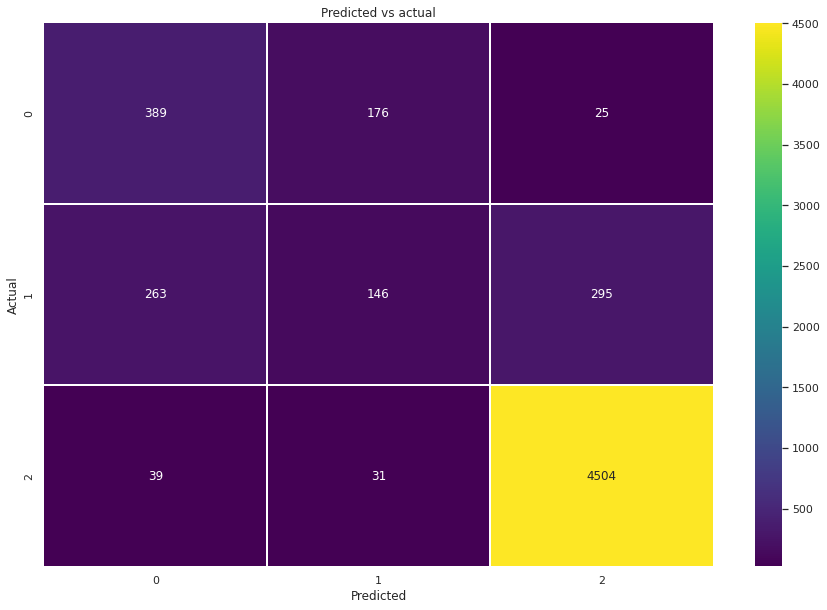

In [108]:
cm_knn = confusion_matrix(y_test, y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_knn, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')

In [109]:
#print(cm)
accuracy_score(y_test, y_pred)

0.8587252897068848

In [110]:
# Visualising the Training set results
#from matplotlib.colors import ListedColormap
#X_set, y_set = sc.inverse_transform(X_train), y_train
#X1, X2 = np.meshgrid(np.arange(start = X_set[:, -1].min() - 10, stop = X_set[:, -1].max() + 10, step = 1),
#                     np.arange(start = X_set[:, -1].min() - 1000, stop = X_set[:, -1].max() + 1000, step = 1))
#plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
#             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
#plt.xlim(X1.min(), X1.max())
#plt.ylim(X2.min(), X2.max())
#for i, j in enumerate(np.unique(y_set)):
#    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
#plt.title('K-NN (Training set)')
#plt.xlabel('Age')
#plt.ylabel('Estimated Salary')
#plt.legend()
#plt.show()

#LDA 

In [111]:
#labelencoder = LabelEncoder()
#df["Sentiment"]=labelencoder.fit_transform(df["Sentiment"])

In [112]:
X = df_new.iloc[:, :-1].values
y = df_new.iloc[:, -1].values

In [113]:
df_new.shape

(23472, 5)

In [114]:
df_new.head()

,Review Text Lenght,Age,Recommended IND,Positive Feedback Count,Sentiment
0,53,33,1,0,2
1,303,34,1,4,2
2,500,60,0,0,1
3,124,50,1,0,2
4,192,47,1,6,2


In [115]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [116]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)

In [117]:
print(lda.explained_variance_ratio_)

[9.992e-01 8.049e-04]


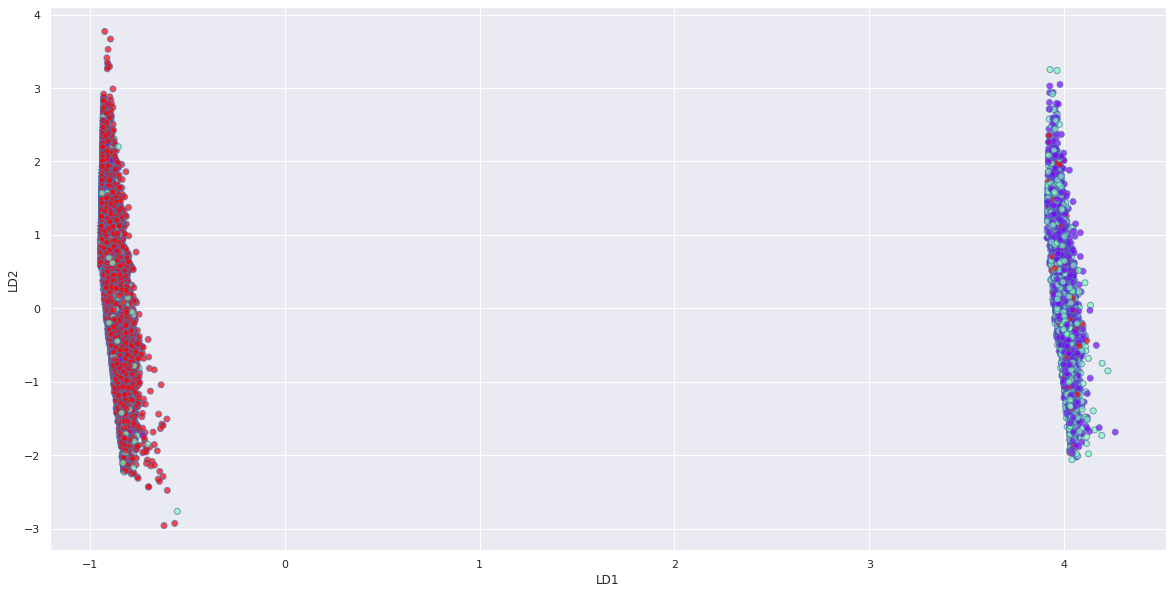

In [118]:
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(X_lda[:,0],X_lda[:,1],
    cmap='rainbow',
    alpha=0.7,
    c=y,
    edgecolors='b'
)

In [119]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X, y)

In [120]:
# First PCA component explains that 99.22% of variance is retained by PCA component #1 , component #2 only accounts for 0.064% variance
pca.explained_variance_ratio_

array([0.9922, 0.0064])

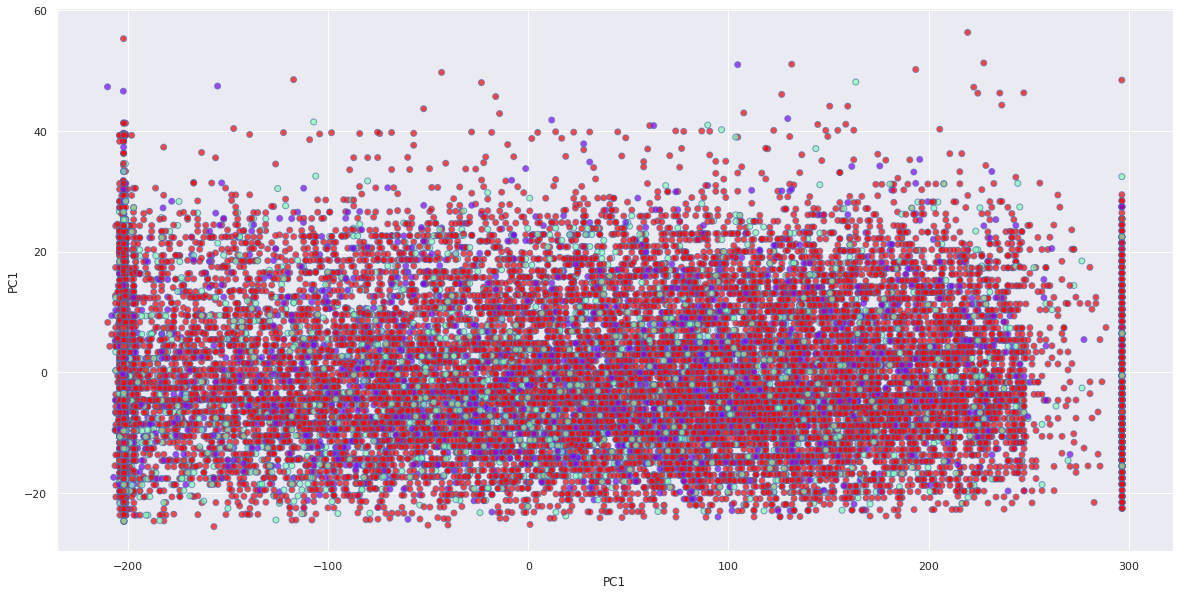

In [121]:
plt.xlabel('PC1')
plt.ylabel('PC1')
plt.scatter(
    X_pca[:,0],
    X_pca[:,1],
    cmap='rainbow',
    alpha=0.7,
    c=y,
    edgecolors='b'
)

In [122]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X, y)

#Classification Report  - Accuracy Score, Recall & Precision 

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, random_state=1)

In [124]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42,
                            max_depth=3)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [125]:
print(f'Train accuracy score {round(clf.score(X_train, y_train)*100,2)} %') # accuracy

Train accuracy score 86.56 %


In [126]:
print(f'Test accuracy score {round(clf.score(X_test, y_test)*100,2)} %') # accuracy

Test accuracy score 86.28 %


In [127]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

Text(0.5, 1.0, 'Predicted vs actual')

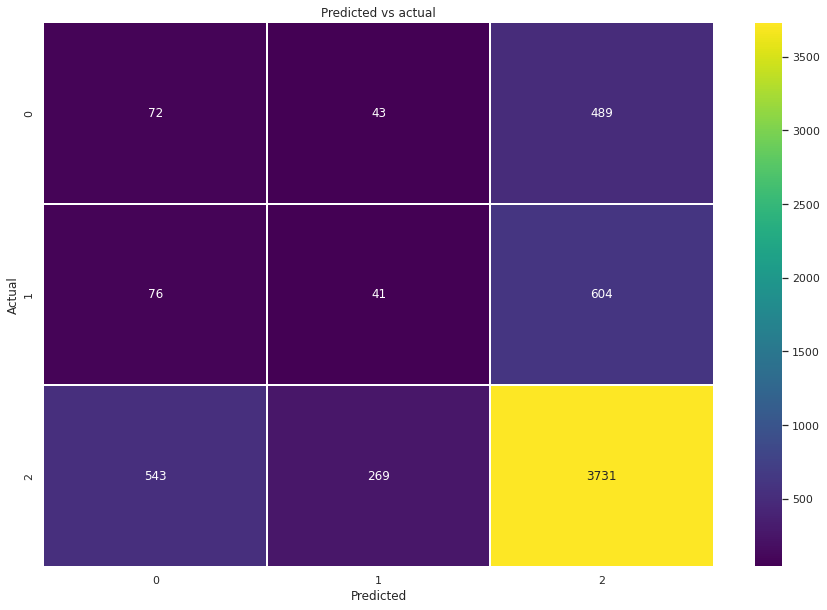

In [128]:
cm_rf = confusion_matrix(y_test, y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_rf, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')

In [129]:
df_new.head()

,Review Text Lenght,Age,Recommended IND,Positive Feedback Count,Sentiment
0,53,33,1,0,2
1,303,34,1,4,2
2,500,60,0,0,1
3,124,50,1,0,2
4,192,47,1,6,2


In [130]:
df_new.tail()

,Review Text Lenght,Age,Recommended IND,Positive Feedback Count,Sentiment
23481,131,34,1,0,2
23482,223,48,1,0,1
23483,208,31,0,1,1
23484,427,28,1,2,1
23485,110,52,1,22,2


In [131]:
#pd.DataFrame(confusion_matrix(y_test, clf.predict(X_test)),
#    columns=["Age", "Rating"],
#    index=["Lenght", "Count"],)

In [132]:
#print(classification_report(y_test, y_pred, target_names=["Sentiment",]))

# Yellow Brick Classifier Metrics

In [133]:
#!pip install yellowbrick
from yellowbrick.classifier import (ConfusionMatrix, ROCAUC, ClassificationReport,
ClassPredictionError, ClassBalance)

## Confusion Matrix

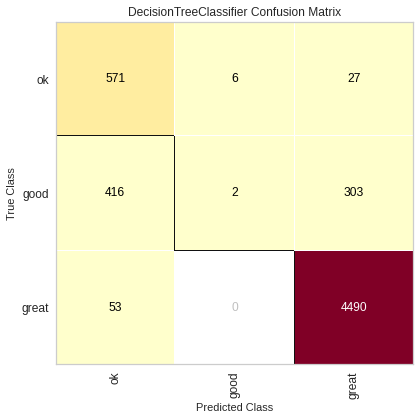

In [134]:
mapping = {0: "ok", 1: "good", 2: "great"}
fig, ax = plt.subplots(figsize=(6, 6))
cm_viz = ConfusionMatrix(clf,
    classes=["ok", "good", "great"],
    label_encoder=mapping,)
cm_viz.score(X_test, y_test)
cm_viz.poof()

## Classification Report

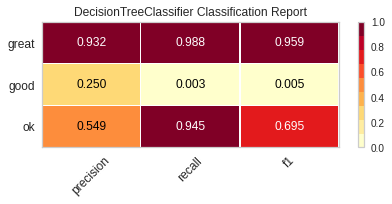

In [135]:
fig, ax = plt.subplots(figsize=(6, 3))
cm_viz = ClassificationReport(clf,
    classes=["ok", "good", "great"],
    label_encoder=mapping,)
cm_viz.score(X_test, y_test)
cm_viz.poof()

## Class Prediction Error

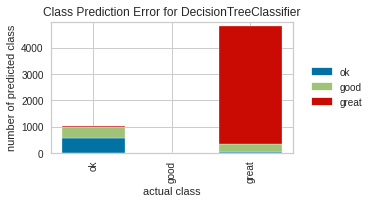

In [136]:
fig, ax = plt.subplots(figsize=(6, 3))
cpe_viz = ClassPredictionError(
    clf, classes=["ok", "good", "great"])

cpe_viz.score(X_test, y_test)
cpe_viz.poof()

## ROC AUC

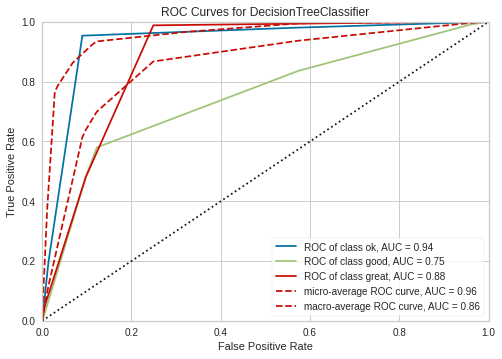

In [137]:
#https://www.scikit-yb.org/en/latest/api/classifier/rocauc.html
visualizer = ROCAUC(clf, classes=["ok", "good", "great"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

## Class Balance Visual

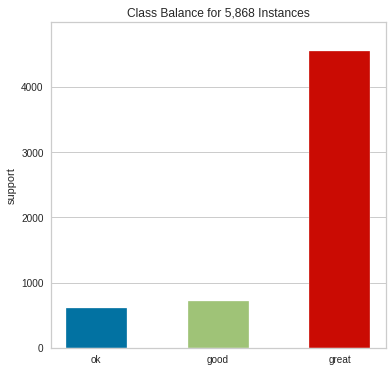

In [138]:
fig, ax = plt.subplots(figsize=(6, 6))
cb_viz = ClassBalance(
    labels=["ok", "good", "great"])

cb_viz.fit(y_test)
cb_viz.poof()

# Neil - LDA - Additional ML models - Sample Adjustment

Running LDA / Decision Tree Classifier / KNeighbors / Logistic Regression. Simple / computationally efficient models for deployment on our large dataset.

In [139]:
X = df_new.iloc[:, :-1].values
Y = df_new.iloc[:, -1].values

In [140]:
df_new.shape

(23472, 5)

In [141]:
df_new.head()

,Review Text Lenght,Age,Recommended IND,Positive Feedback Count,Sentiment
0,53,33,1,0,2
1,303,34,1,4,2
2,500,60,0,0,1
3,124,50,1,0,2
4,192,47,1,6,2


In [142]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans

from matplotlib import pyplot
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [143]:
# partition data into training - test sets - 80% for model training 20% for testing:
validation_size = 0.2
seed = 7
X_train, X_validation, Y_train, Y_validation =\
train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [144]:
# Evaluating model
# Using ten-fold cross validation (recalculating results 10x to adjust for randomness of model / cross validation process. 

num_folds = 10
scoring = 'accuracy'


In [145]:
# framework for adding models 
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier())) #Classification and regresion trees (CART)
# models.append(('KM', KMeans())) #

In [146]:
# initial deployment of models using default tuning parameters

results = []                 # collecting results for later use
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=None)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Mean and Standard Deviation from each alghorithm:

LR: 0.861054 (0.009328)
LDA: 0.863823 (0.004833)
KNN: 0.755552 (0.008116)
CART: 0.794269 (0.010120)


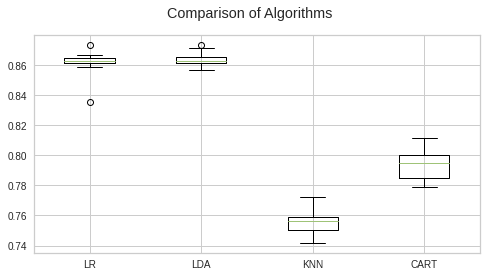

In [147]:
# comparing algorithms further
fig = pyplot.figure()
fig.suptitle('Comparison of Algorithms')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(8,4)
pyplot.show()

Interpretation: we can see high overall predictive accuracy of target customer 'sentiment' across algorithms, with highest accuracy score for LDA and LR in this configuration deployment.

Will now look at clasification table / confusion matrix results for each in turn.

1 --- > Logistic Regression

In [148]:
model = LogisticRegression()
model.fit(X_train, Y_train)


predictions = model.predict(X_validation)
print(model)
print(accuracy_score(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

LogisticRegression()
0.8647497337593184
              precision    recall  f1-score   support

           0       0.53      0.82      0.64       445
           1       0.40      0.07      0.13       560
           2       0.94      0.99      0.96      3690

    accuracy                           0.86      4695
   macro avg       0.62      0.63      0.58      4695
weighted avg       0.83      0.86      0.83      4695



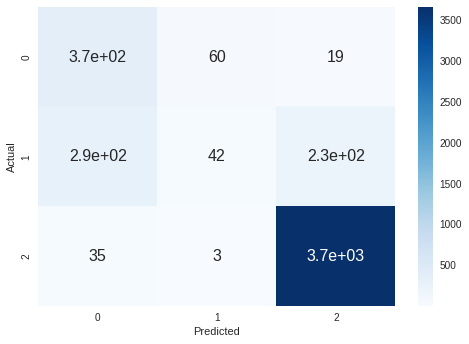

In [149]:
# confusion matrix:

df_cm = pd.DataFrame(confusion_matrix(Y_validation, predictions), \
                     columns=np.unique(Y_validation), index = np.unique(Y_validation))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

2 --- > LDA

In [150]:
model = LinearDiscriminantAnalysis()
model.fit(X_train, Y_train)


predictions = model.predict(X_validation)
print(model)
print(accuracy_score(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

LinearDiscriminantAnalysis()
0.8685835995740149
              precision    recall  f1-score   support

           0       0.54      0.96      0.69       445
           1       0.00      0.00      0.00       560
           2       0.94      0.99      0.96      3690

    accuracy                           0.87      4695
   macro avg       0.49      0.65      0.55      4695
weighted avg       0.79      0.87      0.82      4695



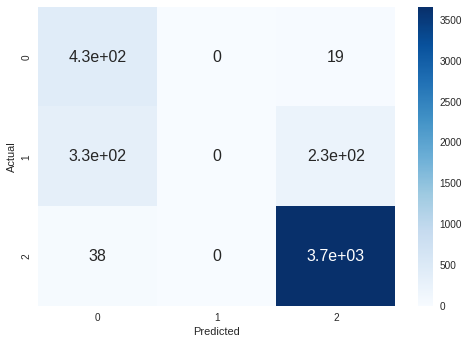

In [151]:
# confusion matrix:

df_cm = pd.DataFrame(confusion_matrix(Y_validation, predictions), \
                     columns=np.unique(Y_validation), index = np.unique(Y_validation))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

3 --- > KNN

In [152]:

model = KNeighborsClassifier()
model.fit(X_train, Y_train)


predictions = model.predict(X_validation)
print(model)
print(accuracy_score(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

KNeighborsClassifier()
0.756975505857295
              precision    recall  f1-score   support

           0       0.24      0.09      0.13       445
           1       0.17      0.07      0.10       560
           2       0.81      0.94      0.87      3690

    accuracy                           0.76      4695
   macro avg       0.41      0.37      0.37      4695
weighted avg       0.68      0.76      0.71      4695



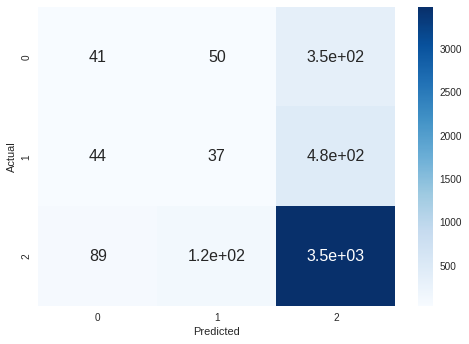

In [153]:
# confusion matrix:

df_cm = pd.DataFrame(confusion_matrix(Y_validation, predictions), \
                     columns=np.unique(Y_validation), index = np.unique(Y_validation))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

4 --- > CART (Classification and regresion trees)

In [154]:
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)


predictions = model.predict(X_validation)
print(model)
print(accuracy_score(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

DecisionTreeClassifier()
0.8021299254526092
              precision    recall  f1-score   support

           0       0.51      0.53      0.52       445
           1       0.26      0.28      0.27       560
           2       0.93      0.91      0.92      3690

    accuracy                           0.80      4695
   macro avg       0.57      0.57      0.57      4695
weighted avg       0.81      0.80      0.81      4695



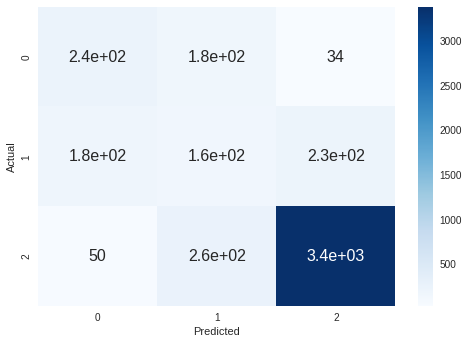

In [155]:
# confusion matrix:

df_cm = pd.DataFrame(confusion_matrix(Y_validation, predictions), \
                     columns=np.unique(Y_validation), index = np.unique(Y_validation))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

Models achieved high accuracy. Confusion matrix indicate LR / LDA had lowest false negative predictions of customer sentiment (negative class 0

# Model Sampling adjustment for dominant 'Positive Sentiment'

Further to our preliminary modelling / ML deployment. The business use-case was further evaluated, with the end-client becoming particularly interested in predicting use cases where customer had negative sentiment ( = 0, as this helps them make better marketing / product decisions etc.)

So as iterative step in our CRSIP-DM process we have sought to focus more on predicting ‘negative sentiment’ for this reason. An important consideration in this context was the question of bias in the model training given the predominance of a dominant positive sentiment count ( =2, hsd 18,194 cases in dataset but only 2,407 negative cases)

In below analysis we have sought to modify the dataset where the dominant case is reduced in quantum so as to undersample it. A modified dataset was established for redeployment of the models comprising 2,407 negative sentiment cases and 2,407 randomly selected positive cases to see if the prediction / recall scores improved (or whether the loss of data was not justified).

In [156]:
# df_new['Sentiment'].value_counts()
df_new['Sentiment'].value_counts(ascending=True)

0     2407
1     2871
2    18194
Name: Sentiment, dtype: int64

In [157]:
df_new['Sentiment'].value_counts(normalize=True)

2    0.775136
1    0.122316
0    0.102548
Name: Sentiment, dtype: float64

Note for target y variable 'sentiment', only 2,407 entries are 0 corresponding to negative customer sentiment 10.25%. As key business use objective is to identify / target and respond to disatisfied customers consideration must be given to how class balance in the data set is biased towards positive sentiment entries.

In [158]:
# undersampling majority positive sentiment = 2 class (randomly / uniformly)

In [159]:
X_train

array([[500,  39,   1,   1],
       [500,  52,   1,   2],
       [111,  62,   1,   1],
       ...,
       [500,  23,   1,   1],
       [270,  29,   1,   1],
       [500,  39,   1,   1]])

In [160]:
Y_train

array([1, 2, 2, ..., 2, 2, 2])

In [161]:
# df2 = pd.concat([X_train, Y_train], axis=1)
negsent_df = df_new.loc[df_new['Sentiment'] == 0]
possent_df = df_new.loc[df_new['Sentiment'] == 2] [:2407]

normal_distributed_df = pd.concat([negsent_df, possent_df])

In [162]:
# shuffle dataframe rows
df_new = normal_distributed_df.sample(frac=1, random_state=42)

In [163]:
# set new validation dataset 

In [164]:
X_train_new = df_new.loc[:, df_new.columns != 'Sentiment']
Y_train_new = df_new["Sentiment"]

In [165]:
# evaluating distribution of Sentiment in rebalanced dataframe

Distribution of Sentiment in rebalanced dataset
0    0.5
2    0.5
Name: Sentiment, dtype: float64


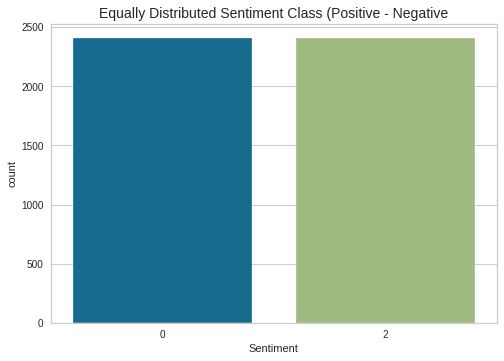

In [166]:
print('Distribution of Sentiment in rebalanced dataset')
print(df_new['Sentiment'].value_counts()/len(df_new))
sns.countplot('Sentiment', data=df_new)
pyplot.title('Equally Distributed Sentiment Class (Positive - Negative', fontsize=14)
pyplot.show()

In [167]:
df_new['Sentiment'].value_counts(ascending=True)

0    2407
2    2407
Name: Sentiment, dtype: int64

# Retraining model and deployment on balanced dataset

In [168]:
df_new.shape

(4814, 5)

In [169]:
# partition data into training - test sets - 80% for model training 20% for testing:
validation_size = 0.2
seed = 7
X_train, X_validation, Y_train, Y_validation =\
train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [170]:
# Evaluating model
# Using ten-fold cross validation (recalculating results 10x to adjust for randomness of model / cross validation process. 

num_folds = 10
scoring = 'accuracy'


In [171]:
# framework for adding models 
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier())) #Classification and regresion trees (CART)
# models.append(('KM', KMeans())) #

In [172]:
# redeployment of models using default tuning parameters

results = []                 # collecting results for later use
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=None)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Mean and Standard Deviation from each alghorithm:

LR: 0.861054 (0.009328)
LDA: 0.863823 (0.004833)
KNN: 0.755552 (0.008116)
CART: 0.793950 (0.009719)


In [173]:
for name, model in models:
    model.fit(X_train, Y_train)

    predictions = model.predict(X_validation)
    print(model)
    print(accuracy_score(Y_validation, predictions))
    print(classification_report(Y_validation, predictions))

LogisticRegression()
0.8647497337593184
              precision    recall  f1-score   support

           0       0.53      0.82      0.64       445
           1       0.40      0.07      0.13       560
           2       0.94      0.99      0.96      3690

    accuracy                           0.86      4695
   macro avg       0.62      0.63      0.58      4695
weighted avg       0.83      0.86      0.83      4695

LinearDiscriminantAnalysis()
0.8685835995740149
              precision    recall  f1-score   support

           0       0.54      0.96      0.69       445
           1       0.00      0.00      0.00       560
           2       0.94      0.99      0.96      3690

    accuracy                           0.87      4695
   macro avg       0.49      0.65      0.55      4695
weighted avg       0.79      0.87      0.82      4695

KNeighborsClassifier()
0.756975505857295
              precision    recall  f1-score   support

           0       0.24      0.09      0.13       445


marginal improvement in accuracy achieved across models